## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

## 1.1 Import the data and create the anchor date columns

In [0]:
#1.1.1 
# File location and type
file_location = "/FileStore/tables/Retail_Data_Transactions-1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
txn = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

_c0 _c1 _c2 customer_id trans_date tran_amount CS5295 11-Feb-13 35 CS4768 15-Mar-15 39 CS2122 26-Feb-13 52 CS1217 16-Nov-11 99 CS1850 20-Nov-13 78 CS5539 26-Mar-14 81 CS2724 06-Feb-12 93 CS5902 30-Jan-15 89 CS6040 08-Jan-13 76 CS3802 20-Aug-13 75 CS3494 02-Jul-13 94 CS3780 25-Mar-13 80 CS1171 03-Nov-12 59 CS2892 12-May-13 43 CS5552 29-Dec-14 78 CS6043 15-Jan-14 98 CS4147 08-Jul-13 81 CS4655 30-Dec-13 93 CS3904 20-Jul-14 103 CS4102 09-Jul-11 96 CS2086 05-Mar-13 75 CS6085 09-Jan-13 49 CS1328 06-Feb-13 54 CS4564 27-Mar-12 48 CS5910 01-Jan-12 98 CS2748 23-Mar-13 37 CS5147 29-Apr-13 72 CS1770 02-Nov-12 83 CS3510 24-Oct-11 81 CS2509 05-Dec-11 105 CS2859 27-Feb-15 77 CS1512 21-Feb-15 71 CS4148 22-Aug-13 48 CS1735 31-Mar-12 70 CS1588 27-Jan-12 70 CS5514 09-Jan-13 36 CS5933 07-Oct-13 48 CS2797 06-Mar-14 87 CS5313 02-Dec-12 88 CS5966 09-Mar-12 39 CS5211 18-May-14 51 CS1511 13-Jan-15 47 CS6087 24-Nov-14 37 CS5909 04-Feb-12 80 CS2845 08-Mar-13 105 CS1433 05-Nov-12 78 CS4897 12-Apr-14 45 CS2296 28-Dec-12 79 CS1494 29-Jun-13 59 CS3688 19-Jun-14 55 CS2287 23-Dec-11 94 CS3779 26-Jun-11 69 CS1423 05-Jun-14 78 CS2501 14-Nov-12 59 CS3434 22-Feb-13 98 CS2662 31-Aug-14 88 CS2209 12-Mar-12 35 CS4530 05-Jun-11 40 CS2848 04-Feb-13 53 CS2596 19-Sep-11 55 CS4421 20-May-12 86 CS4905 13-Apr-12 93 CS5704 04-Dec-11 79 CS2403 27-Jul-14 94 CS5480 28-Jan-12 63 CS5811 23-Aug-13 91 CS2051 09-Dec-14 101 CS3957 30-Aug-12 69 CS4704 25-Nov-14 41 CS2289 19-May-12 67 CS5218 21-Jun-14 45 CS4637 20-May-11 71 CS3158 06-May-12 91 CS4176 30-Jul-12 49 CS1939 25-Nov-11 101 CS5403 01-Dec-11 64 CS5489 02-Dec-14 77 CS4563 30-May-11 101 CS3508 23-May-12 67 CS2703 12-Oct-14 40 CS2596 01-May-13 76 CS5990 19-Oct-12 103 CS4215 09-Jul-11 54 CS4811 26-Jan-12 77 CS2070 30-Jan-13 41 CS3419 29-Jan-15 38 CS3668 14-Aug-14 102 CS4623 27-Sep-13 89 CS4708 02-Jul-13 48 CS1816 22-Sep-13 64 CS5376 08-Dec-13 44 CS4568 15-Nov-11 70 CS1779 27-Jan-12 53 CS2447 10-Jul-11 82 CS1985 16-Aug-11 87 CS2544 07-Nov-11 64 CS2158 11-Sep-12 89 CS5776 09-Sep-14 87 CS5653 04-Sep-13 98 CS2291 15-Oct-14 67 CS6088 29-Oct-12 48 CS4245 02-Jun-14 102 CS3344 02-Jul-14 56 CS1481 23-Dec-13 50 CS5400 23-Dec-11 56 CS5463 27-Aug-14 91 CS5951 07-Aug-14 104 CS5515 19-Feb-12 41 CS3039 01-May-12 92 CS1836 24-Mar-12 63 CS4320 09-Apr-14 52 CS4889 01-Dec-11 38 CS1319 26-Sep-11 95 CS4859 07-Jan-15 50 CS4148 08-Feb-14 40 CS5264 03-Apr-13 81 CS4041 29-Dec-14 49 CS2183 04-Jan-13 39 CS2516 15-Feb-15 55 CS1890 03-Nov-12 37 CS3730 11-Feb-13 89 CS5382 07-Mar-13 48 CS5970 13-Jun-14 40 CS5260 30-Jan-15 46 CS2437 13-Nov-11 90 CS4675 11-Sep-11 67 CS2920 11-Oct-11 87 CS2548 28-Sep-13 73 CS1818 26-Dec-11 46 CS6098 28-Sep-12 42 CS2712 26-Dec-11 65 CS2714 14-Dec-11 69 CS2615 17-Aug-13 39 CS5445 27-Jul-14 72 CS5812 02-Nov-14 62 CS4636 22-Sep-13 66 CS3147 04-Jun-14 84 CS1273 01-Feb-12 91 CS4243 11-Nov-11 48 CS2357 13-Apr-12 71 CS1776 03-May-14 79 CS5643 02-Mar-13 104 CS4522 06-Mar-15 82 CS2418 01-Feb-15 51 CS1330 21-Nov-14 41 CS1195 29-Dec-14 83 CS4306 07-Mar-15 54 CS2137 29-Sep-13 73 CS3518 19-Jun-13 54 CS5835 18-Sep-11 52 CS4701 15-Jan-15 95 CS4548 28-Jun-12 38 CS2384 15-Oct-12 35 CS4081 17-Feb-13 74 CS5976 02-Jan-12 99 CS3874 08-Sep-11 44 CS5356 17-Jun-14 105 CS4667 17-Sep-14 66 CS4328 04-Jun-12 56 CS3291 02-Aug-13 42 CS4282 11-Sep-11 44 CS4331 25-Sep-11 70 CS1243 17-Mar-13 36 CS2390 20-May-14 104 CS2207 05-Apr-14 71 CS1270 18-Nov-11 104 CS1219 11-Nov-14 91 CS5427 13-Nov-12 96 CS5474 18-May-11 69 CS5109 23-May-12 92 CS5287 14-Mar-15 94 CS3477 05-May-13 80 CS3970 13-Dec-11 86 CS5760 08-Dec-11 59 CS2149 04-Apr-13 83 CS4934 19-Jul-14 80 CS1517 18-Oct-13 89 CS1641 29-Dec-12 64 CS2187 19-Nov-11 70 CS5359 12-Aug-14 96 CS3124 08-Dec-11 71 CS1721 30-Aug-12 96 CS5212 22-Jan-15 42 CS5111 23-Aug-11 81 CS3137 04-Apr-12 67 CS1511 25-Jan-15 69 CS2509 23-Feb-14 92 CS5994 11-Jan-14 42 CS2613 25-Aug-13 103 CS1934 18-Aug-14 89 CS3127 02-Oct-11 39 CS5225 18-Mar-14 104 CS1815 17-Nov-12 83 CS3552 27-Apr-14 102 CS1893 17-Nov-13 42 CS3621 26-Oct-13 56 CS4330 17-Jul-13

In [0]:
print("There are {} rows.".format(txn.count()))

There are 125000 rows.


In [0]:
#1.1.2 new column ’txn date’ from ’trans date’
import pyspark.sql.functions as F
from pyspark.sql.functions import to_date

txn = txn.withColumn("txn_date", to_date(F.col("trans_date"), "dd-MMM-yy")).drop("trans_date")
display(txn)

customer_id tran_amount txn_date CS5295 35 2013-02-11 CS4768 39 2015-03-15 CS2122 52 2013-02-26 CS1217 99 2011-11-16 CS1850 78 2013-11-20 CS5539 81 2014-03-26 CS2724 93 2012-02-06 CS5902 89 2015-01-30 CS6040 76 2013-01-08 CS3802 75 2013-08-20 CS3494 94 2013-07-02 CS3780 80 2013-03-25 CS1171 59 2012-11-03 CS2892 43 2013-05-12 CS5552 78 2014-12-29 CS6043 98 2014-01-15 CS4147 81 2013-07-08 CS4655 93 2013-12-30 CS3904 103 2014-07-20 CS4102 96 2011-07-09 CS2086 75 2013-03-05 CS6085 49 2013-01-09 CS1328 54 2013-02-06 CS4564 48 2012-03-27 CS5910 98 2012-01-01 CS2748 37 2013-03-23 CS5147 72 2013-04-29 CS1770 83 2012-11-02 CS3510 81 2011-10-24 CS2509 105 2011-12-05 CS2859 77 2015-02-27 CS1512 71 2015-02-21 CS4148 48 2013-08-22 CS1735 70 2012-03-31 CS1588 70 2012-01-27 CS5514 36 2013-01-09 CS5933 48 2013-10-07 CS2797 87 2014-03-06 CS5313 88 2012-12-02 CS5966 39 2012-03-09 CS5211 51 2014-05-18 CS1511 47 2015-01-13 CS6087 37 2014-11-24 CS5909 80 2012-02-04 CS2845 105 2013-03-08 CS1433 78 2012-11-05 CS4897 45 2014-04-12 CS2296 79 2012-12-28 CS1494 59 2013-06-29 CS3688 55 2014-06-19 CS2287 94 2011-12-23 CS3779 69 2011-06-26 CS1423 78 2014-06-05 CS2501 59 2012-11-14 CS3434 98 2013-02-22 CS2662 88 2014-08-31 CS2209 35 2012-03-12 CS4530 40 2011-06-05 CS2848 53 2013-02-04 CS2596 55 2011-09-19 CS4421 86 2012-05-20 CS4905 93 2012-04-13 CS5704 79 2011-12-04 CS2403 94 2014-07-27 CS5480 63 2012-01-28 CS5811 91 2013-08-23 CS2051 101 2014-12-09 CS3957 69 2012-08-30 CS4704 41 2014-11-25 CS2289 67 2012-05-19 CS5218 45 2014-06-21 CS4637 71 2011-05-20 CS3158 91 2012-05-06 CS4176 49 2012-07-30 CS1939 101 2011-11-25 CS5403 64 2011-12-01 CS5489 77 2014-12-02 CS4563 101 2011-05-30 CS3508 67 2012-05-23 CS2703 40 2014-10-12 CS2596 76 2013-05-01 CS5990 103 2012-10-19 CS4215 54 2011-07-09 CS4811 77 2012-01-26 CS2070 41 2013-01-30 CS3419 38 2015-01-29 CS3668 102 2014-08-14 CS4623 89 2013-09-27 CS4708 48 2013-07-02 CS1816 64 2013-09-22 CS5376 44 2013-12-08 CS4568 70 2011-11-15 CS1779 53 2012-01-27 CS2447 82 2011-07-10 CS1985 87 2011-08-16 CS2544 64 2011-11-07 CS2158 89 2012-09-11 CS5776 87 2014-09-09 CS5653 98 2013-09-04 CS2291 67 2014-10-15 CS6088 48 2012-10-29 CS4245 102 2014-06-02 CS3344 56 2014-07-02 CS1481 50 2013-12-23 CS5400 56 2011-12-23 CS5463 91 2014-08-27 CS5951 104 2014-08-07 CS5515 41 2012-02-19 CS3039 92 2012-05-01 CS1836 63 2012-03-24 CS4320 52 2014-04-09 CS4889 38 2011-12-01 CS1319 95 2011-09-26 CS4859 50 2015-01-07 CS4148 40 2014-02-08 CS5264 81 2013-04-03 CS4041 49 2014-12-29 CS2183 39 2013-01-04 CS2516 55 2015-02-15 CS1890 37 2012-11-03 CS3730 89 2013-02-11 CS5382 48 2013-03-07 CS5970 40 2014-06-13 CS5260 46 2015-01-30 CS2437 90 2011-11-13 CS4675 67 2011-09-11 CS2920 87 2011-10-11 CS2548 73 2013-09-28 CS1818 46 2011-12-26 CS6098 42 2012-09-28 CS2712 65 2011-12-26 CS2714 69 2011-12-14 CS2615 39 2013-08-17 CS5445 72 2014-07-27 CS5812 62 2014-11-02 CS4636 66 2013-09-22 CS3147 84 2014-06-04 CS1273 91 2012-02-01 CS4243 48 2011-11-11 CS2357 71 2012-04-13 CS1776 79 2014-05-03 CS5643 104 2013-03-02 CS4522 82 2015-03-06 CS2418 51 2015-02-01 CS1330 41 2014-11-21 CS1195 83 2014-12-29 CS4306 54 2015-03-07 CS2137 73 2013-09-29 CS3518 54 2013-06-19 CS5835 52 2011-09-18 CS4701 95 2015-01-15 CS4548 38 2012-06-28 CS2384 35 2012-10-15 CS4081 74 2013-02-17 CS5976 99 2012-01-02 CS3874 44 2011-09-08 CS5356 105 2014-06-17 CS4667 66 2014-09-17 CS4328 56 2012-06-04 CS3291 42 2013-08-02 CS4282 44 2011-09-11 CS4331 70 2011-09-25 CS1243 36 2013-03-17 CS2390 104 2014-05-20 CS2207 71 2014-04-05 CS1270 104 2011-11-18 CS1219 91 2014-11-11 CS5427 96 2012-11-13 CS5474 69 2011-05-18 CS5109 92 2012-05-23 CS5287 94 2015-03-14 CS3477 80 2013-05-05 CS3970 86 2011-12-13 CS5760 59 2011-12-08 CS2149 83 2013-04-04 CS4934 80 2014-07-19 CS1517 89 2013-10-18 CS1641 64 2012-12-29 CS2187 70 2011-11-19 CS5359 96 2014-08-12 CS3124 71 2011-12-08 CS1721 96 2012-08-30 CS5212 42 2015-01-22 CS5111 81 2011-08-23 CS3137 67 2012-04-04 CS1511 69 2015-01-25 CS2509 92 2014-02-23 CS5994 42 2014-01-11 CS261

In [0]:
#1.1.3
# min() of column ’txn date’.
txn.agg({"txn_date":"min"}).show()

#max() of column ’txn date’
txn.agg({"txn_date":"max"}).show()

+-------------+
|min(txn_date)|
+-------------+
|   2011-05-16|
+-------------+

+-------------+
|max(txn_date)|
+-------------+
|   2015-03-16|
+-------------+



In [0]:
#1.1.4 ’ME DT’: the last day of the month in the ’trans date’ column.
#1.1.5 ’YEAR’: the year in the ’trans date’ column.
from pyspark.sql.functions import last_day
from pyspark.sql.functions import year
txn = txn.withColumn("ME_DT",last_day(F.col("txn_date")))
txn = txn.withColumn("YEAR",year(F.col("txn_date")))

In [0]:
# table output
display(txn)

customer_id tran_amount txn_date ME_DT YEAR CS5295 35 2013-02-11 2013-02-28 2013 CS4768 39 2015-03-15 2015-03-31 2015 CS2122 52 2013-02-26 2013-02-28 2013 CS1217 99 2011-11-16 2011-11-30 2011 CS1850 78 2013-11-20 2013-11-30 2013 CS5539 81 2014-03-26 2014-03-31 2014 CS2724 93 2012-02-06 2012-02-29 2012 CS5902 89 2015-01-30 2015-01-31 2015 CS6040 76 2013-01-08 2013-01-31 2013 CS3802 75 2013-08-20 2013-08-31 2013 CS3494 94 2013-07-02 2013-07-31 2013 CS3780 80 2013-03-25 2013-03-31 2013 CS1171 59 2012-11-03 2012-11-30 2012 CS2892 43 2013-05-12 2013-05-31 2013 CS5552 78 2014-12-29 2014-12-31 2014 CS6043 98 2014-01-15 2014-01-31 2014 CS4147 81 2013-07-08 2013-07-31 2013 CS4655 93 2013-12-30 2013-12-31 2013 CS3904 103 2014-07-20 2014-07-31 2014 CS4102 96 2011-07-09 2011-07-31 2011 CS2086 75 2013-03-05 2013-03-31 2013 CS6085 49 2013-01-09 2013-01-31 2013 CS1328 54 2013-02-06 2013-02-28 2013 CS4564 48 2012-03-27 2012-03-31 2012 CS5910 98 2012-01-01 2012-01-31 2012 CS2748 37 2013-03-23 2013-03-31 2013 CS5147 72 2013-04-29 2013-04-30 2013 CS1770 83 2012-11-02 2012-11-30 2012 CS3510 81 2011-10-24 2011-10-31 2011 CS2509 105 2011-12-05 2011-12-31 2011 CS2859 77 2015-02-27 2015-02-28 2015 CS1512 71 2015-02-21 2015-02-28 2015 CS4148 48 2013-08-22 2013-08-31 2013 CS1735 70 2012-03-31 2012-03-31 2012 CS1588 70 2012-01-27 2012-01-31 2012 CS5514 36 2013-01-09 2013-01-31 2013 CS5933 48 2013-10-07 2013-10-31 2013 CS2797 87 2014-03-06 2014-03-31 2014 CS5313 88 2012-12-02 2012-12-31 2012 CS5966 39 2012-03-09 2012-03-31 2012 CS5211 51 2014-05-18 2014-05-31 2014 CS1511 47 2015-01-13 2015-01-31 2015 CS6087 37 2014-11-24 2014-11-30 2014 CS5909 80 2012-02-04 2012-02-29 2012 CS2845 105 2013-03-08 2013-03-31 2013 CS1433 78 2012-11-05 2012-11-30 2012 CS4897 45 2014-04-12 2014-04-30 2014 CS2296 79 2012-12-28 2012-12-31 2012 CS1494 59 2013-06-29 2013-06-30 2013 CS3688 55 2014-06-19 2014-06-30 2014 CS2287 94 2011-12-23 2011-12-31 2011 CS3779 69 2011-06-26 2011-06-30 2011 CS1423 78 2014-06-05 2014-06-30 2014 CS2501 59 2012-11-14 2012-11-30 2012 CS3434 98 2013-02-22 2013-02-28 2013 CS2662 88 2014-08-31 2014-08-31 2014 CS2209 35 2012-03-12 2012-03-31 2012 CS4530 40 2011-06-05 2011-06-30 2011 CS2848 53 2013-02-04 2013-02-28 2013 CS2596 55 2011-09-19 2011-09-30 2011 CS4421 86 2012-05-20 2012-05-31 2012 CS4905 93 2012-04-13 2012-04-30 2012 CS5704 79 2011-12-04 2011-12-31 2011 CS2403 94 2014-07-27 2014-07-31 2014 CS5480 63 2012-01-28 2012-01-31 2012 CS5811 91 2013-08-23 2013-08-31 2013 CS2051 101 2014-12-09 2014-12-31 2014 CS3957 69 2012-08-30 2012-08-31 2012 CS4704 41 2014-11-25 2014-11-30 2014 CS2289 67 2012-05-19 2012-05-31 2012 CS5218 45 2014-06-21 2014-06-30 2014 CS4637 71 2011-05-20 2011-05-31 2011 CS3158 91 2012-05-06 2012-05-31 2012 CS4176 49 2012-07-30 2012-07-31 2012 CS1939 101 2011-11-25 2011-11-30 2011 CS5403 64 2011-12-01 2011-12-31 2011 CS5489 77 2014-12-02 2014-12-31 2014 CS4563 101 2011-05-30 2011-05-31 2011 CS3508 67 2012-05-23 2012-05-31 2012 CS2703 40 2014-10-12 2014-10-31 2014 CS2596 76 2013-05-01 2013-05-31 2013 CS5990 103 2012-10-19 2012-10-31 2012 CS4215 54 2011-07-09 2011-07-31 2011 CS4811 77 2012-01-26 2012-01-31 2012 CS2070 41 2013-01-30 2013-01-31 2013 CS3419 38 2015-01-29 2015-01-31 2015 CS3668 102 2014-08-14 2014-08-31 2014 CS4623 89 2013-09-27 2013-09-30 2013 CS4708 48 2013-07-02 2013-07-31 2013 CS1816 64 2013-09-22 2013-09-30 2013 CS5376 44 2013-12-08 2013-12-31 2013 CS4568 70 2011-11-15 2011-11-30 2011 CS1779 53 2012-01-27 2012-01-31 2012 CS2447 82 2011-07-10 2011-07-31 2011 CS1985 87 2011-08-16 2011-08-31 2011 CS2544 64 2011-11-07 2011-11-30 2011 CS2158 89 2012-09-11 2012-09-30 2012 CS5776 87 2014-09-09 2014-09-30 2014 CS5653 98 2013-09-04 2013-09-30 2013 CS2291 67 2014-10-15 2014-10-31 2014 CS6088 48 2012-10-29 2012-10-31 2012 CS4245 102 2014-06-02 2014-06-30 2014 CS3344 56 2014-07-02 2014-07-31 2014 CS1481 50 2013-12-23 2013-12-31 2013 CS5400 56 2011-12-23 2011-12-31 2011 CS5463 91 2014-08-27 2014-08-31 2014 CS5951 104 2014-08-07 201

## 1.2 Create features that capture annual spending

In [0]:
#1.2.1 clnt annual aggregations, the annual aggre- gations dataframe: 
# with sum, mean, std, var, sem, max, min, count as the aggregation functions.
clnt_annual_aggregations=txn.groupBy("customer_id","YEAR").agg(F.sum("tran_amount").alias("ann_txn_amt_sum"),
                                                               F.avg("tran_amount").alias("ann_txn_amt_ave"),
                                                               F.stddev("tran_amount").alias("ann_txn_amt_std"),
                                                               F.var_samp("tran_amount").alias("ann_txn_amt_var"),
                                                               F.stddev_pop("tran_amount").alias("ann_txn_amt_sem"),
                                                               F.max("tran_amount").alias("ann_txn_amt_max"),
                                                               F.min("tran_amount").alias("ann_txn_amt_min"),
                                                               F.count("tran_amount").alias("ann_txn_cnt")).orderBy(txn.customer_id.asc(),
                                                                                                                    txn.YEAR.asc())
display(clnt_annual_aggregations)

customer_id YEAR ann_txn_amt_sum ann_txn_amt_ave ann_txn_amt_std ann_txn_amt_var ann_txn_amt_sem ann_txn_amt_max ann_txn_amt_min ann_txn_cnt CS1112 2011 212.0 70.66666666666667 22.03028218914441 485.33333333333337 17.98765008430939 96 56 3 CS1112 2012 337.0 67.4 12.720062892926277 161.8 11.377170122662314 81 52 5 CS1112 2013 212.0 70.66666666666667 34.50120770833006 1190.3333333333333 28.1701181317288 71 105 3 CS1112 2014 212.0 70.66666666666667 16.862186493255653 284.33333333333337 13.767917618708923 90 59 3 CS1112 2015 39.0 39.0 null null 0.0 39 39 1 CS1113 2011 244.0 81.33333333333333 21.07921567168317 444.33333333333337 17.21110752456745 94 57 3 CS1113 2012 374.0 74.8 17.035257556021865 290.20000000000005 15.236797563792729 95 51 5 CS1113 2013 426.0 85.2 13.0843417870369 171.2 11.702991070662234 97 65 5 CS1113 2014 226.0 56.5 27.958302285129307 781.6666666666666 24.212600025606502 97 36 4 CS1113 2015 220.0 73.33333333333333 27.300793639257694 745.3333333333334 22.29100466306732 98 44 3 CS1114 2011 426.0 85.2 9.731392500562293 94.70000000000003 8.704022058795578 97 76 5 CS1114 2012 150.0 75.0 31.11269837220809 968.0 22.0 97 53 2 CS1114 2013 352.0 70.4 24.88573888796553 619.3 22.25848152952038 84 105 5 CS1114 2014 425.0 70.83333333333333 26.947479783212874 726.1666666666666 24.599570908633524 95 37 6 CS1114 2015 79.0 79.0 null null 0.0 79 79 1 CS1115 2011 261.0 87.0 15.0 225.0 12.24744871391589 87 102 3 CS1115 2012 473.0 67.57142857142857 21.846869667888676 477.2857142857143 20.226271055642624 88 104 7 CS1115 2013 557.0 79.57142857142857 10.533393610436333 110.95238095238098 9.752027523357722 94 66 7 CS1115 2014 313.0 78.25 22.632940595512547 512.2499999999999 19.600701518057967 98 50 4 CS1115 2015 55.0 55.0 null null 0.0 55 55 1 CS1116 2011 235.0 58.75 21.203380233664003 449.5833333333333 18.362665928453854 87 41 4 CS1116 2012 230.0 76.66666666666667 30.138568866708543 908.3333333333334 24.608038433722335 80 105 3 CS1116 2013 59.0 59.0 null null 0.0 59 59 1 CS1116 2014 333.0 66.6 25.234896472940004 636.8 22.570777567465413 96 40 5 CS1117 2011 213.0 71.0 26.057628441590765 679.0 21.275964529643932 98 46 3 CS1117 2012 196.0 65.33333333333333 32.715949219506584 1070.3333333333335 26.71246067953223 61 100 3 CS1117 2013 347.0 69.4 17.38677658451963 302.30000000000007 15.551205741035004 94 49 5 CS1117 2014 429.0 71.5 15.871357849913158 251.9 14.488501187723548 94 56 6 CS1118 2011 124.0 62.0 26.870057685088806 722.0 19.0 81 43 2 CS1118 2012 63.0 63.0 null null 0.0 63 63 1 CS1118 2013 144.0 72.0 7.0710678118654755 50.0 5.0 77 67 2 CS1118 2014 620.0 68.88888888888889 23.5661008890124 555.3611111111111 22.218332992995993 98 101 9 CS1118 2015 60.0 60.0 null null 0.0 60 60 1 CS1119 2012 411.0 82.2 27.30750812505601 745.7 24.424577785501228 87 100 5 CS1119 2013 239.0 79.66666666666667 26.85764943797825 721.3333333333334 21.9291789378647 99 49 3 CS1119 2014 449.0 74.83333333333333 21.5445275340785 464.16666666666663 19.667372868676576 93 36 6 CS1119 2015 59.0 59.0 null null 0.0 59 59 1 CS1120 2011 410.0 82.0 22.561028345356956 509.0 20.1791972090071 86 101 5 CS1120 2012 352.0 70.4 19.37266114915553 375.3 17.327434893832383 96 50 5 CS1120 2013 508.0 72.57142857142857 23.387013083170345 546.9523809523808 21.652166786042734 98 100 7 CS1120 2014 75.0 75.0 null null 0.0 75 75 1 CS1120 2015 332.0 55.333333333333336 15.819818793736758 250.2666666666667 14.44145268162298 84 41 6 CS1121 2011 288.0 72.0 32.03123475609393 1026.0 27.739863013360395 97 102 4 CS1121 2012 613.0 61.3 22.652201266592662 513.1222222222223 21.489765005695155 86 104 10 CS1121 2013 283.0 56.6 20.971409108593537 439.8 18.757398540309367 88 38 5 CS1121 2014 303.0 50.5 12.973048986263793 168.30000000000004 11.842719282327012 73 38 6 CS1121 2015 37.0 37.0 null null 0.0 37 37 1 CS1122 2011 406.0 81.2 18.965758619153622 359.69999999999993 16.963490206912017 90 104 5 CS1122 2012 284.0 56.8 21.076052761368768 444.2 18.850994668717085 87 35 5 CS1122 2013 202.0 67.33333333333333 23.62

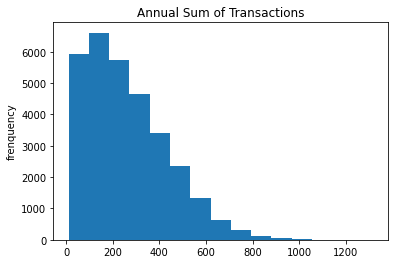

In [0]:
#1.2.2 histogram of the sum

bins, counts = clnt_annual_aggregations.select('ann_txn_amt_sum').rdd.flatMap(lambda x: x).histogram(15)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Annual Sum of Transactions')
plt.ylabel('frenquency')
plt.show()

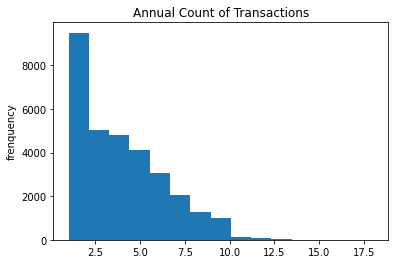

In [0]:
# histogram of the count
bins, counts = clnt_annual_aggregations.select('ann_txn_cnt').rdd.flatMap(lambda x: x).histogram(15)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Annual Count of Transactions')
plt.ylabel('frenquency')
plt.show()

In [0]:
#1.2.3
temp = txn.groupBy("customer_id").pivot("YEAR").agg(F.sum("tran_amount").alias("ann_txn_amt_sum"),
                                                               F.avg("tran_amount").alias("ann_txn_amt_ave"),
                                                               F.stddev("tran_amount").alias("ann_txn_amt_std"),
                                                               F.var_samp("tran_amount").alias("ann_txn_amt_var"),
                                                               F.stddev_pop("tran_amount").alias("ann_txn_amt_sem"),
                                                               F.max("tran_amount").alias("ann_txn_amt_max"),
                                                               F.min("tran_amount").alias("ann_txn_amt_min"),
                                                               F.count("tran_amount").alias("ann_txn_cnt"))

# Order the id , fill na with 0: 
clnt_annual_aggregations_pivot = temp.orderBy(temp.customer_id).fillna(0)
display(clnt_annual_aggregations_pivot)

customer_id 2011_ann_txn_amt_sum 2011_ann_txn_amt_ave 2011_ann_txn_amt_std 2011_ann_txn_amt_var 2011_ann_txn_amt_sem 2011_ann_txn_amt_max 2011_ann_txn_amt_min 2011_ann_txn_cnt 2012_ann_txn_amt_sum 2012_ann_txn_amt_ave 2012_ann_txn_amt_std 2012_ann_txn_amt_var 2012_ann_txn_amt_sem 2012_ann_txn_amt_max 2012_ann_txn_amt_min 2012_ann_txn_cnt 2013_ann_txn_amt_sum 2013_ann_txn_amt_ave 2013_ann_txn_amt_std 2013_ann_txn_amt_var 2013_ann_txn_amt_sem 2013_ann_txn_amt_max 2013_ann_txn_amt_min 2013_ann_txn_cnt 2014_ann_txn_amt_sum 2014_ann_txn_amt_ave 2014_ann_txn_amt_std 2014_ann_txn_amt_var 2014_ann_txn_amt_sem 2014_ann_txn_amt_max 2014_ann_txn_amt_min 2014_ann_txn_cnt 2015_ann_txn_amt_sum 2015_ann_txn_amt_ave 2015_ann_txn_amt_std 2015_ann_txn_amt_var 2015_ann_txn_amt_sem 2015_ann_txn_amt_max 2015_ann_txn_amt_min 2015_ann_txn_cnt CS1112 212.0 70.66666666666667 22.03028218914441 485.33333333333337 17.98765008430939 96 56 3 337.0 67.4 12.720062892926277 161.8 11.377170122662314 81 52 5 212.0 70.66666666666667 34.50120770833006 1190.3333333333333 28.1701181317288 71 105 3 212.0 70.66666666666667 16.862186493255653 284.33333333333337 13.767917618708923 90 59 3 39.0 39.0 0.0 0.0 0.0 39 39 1 CS1113 244.0 81.33333333333333 21.07921567168317 444.33333333333337 17.21110752456745 94 57 3 374.0 74.8 17.035257556021865 290.20000000000005 15.236797563792729 95 51 5 426.0 85.2 13.0843417870369 171.2 11.702991070662234 97 65 5 226.0 56.5 27.958302285129307 781.6666666666666 24.212600025606502 97 36 4 220.0 73.33333333333333 27.300793639257694 745.3333333333334 22.29100466306732 98 44 3 CS1114 426.0 85.2 9.731392500562293 94.70000000000003 8.704022058795578 97 76 5 150.0 75.0 31.11269837220809 968.0 22.0 97 53 2 352.0 70.4 24.88573888796553 619.3 22.25848152952038 84 105 5 425.0 70.83333333333333 26.947479783212874 726.1666666666666 24.599570908633524 95 37 6 79.0 79.0 0.0 0.0 0.0 79 79 1 CS1115 261.0 87.0 15.0 225.0 12.24744871391589 87 102 3 473.0 67.57142857142857 21.846869667888676 477.2857142857143 20.226271055642624 88 104 7 557.0 79.57142857142857 10.533393610436333 110.95238095238098 9.752027523357722 94 66 7 313.0 78.25 22.632940595512547 512.2499999999999 19.600701518057967 98 50 4 55.0 55.0 0.0 0.0 0.0 55 55 1 CS1116 235.0 58.75 21.203380233664003 449.5833333333333 18.362665928453854 87 41 4 230.0 76.66666666666667 30.138568866708543 908.3333333333334 24.608038433722335 80 105 3 59.0 59.0 0.0 0.0 0.0 59 59 1 333.0 66.6 25.234896472940004 636.8 22.570777567465413 96 40 5 0.0 0.0 0.0 0.0 0.0 null null 0 CS1117 213.0 71.0 26.057628441590765 679.0 21.275964529643932 98 46 3 196.0 65.33333333333333 32.715949219506584 1070.3333333333335 26.71246067953223 61 100 3 347.0 69.4 17.38677658451963 302.30000000000007 15.551205741035004 94 49 5 429.0 71.5 15.871357849913158 251.9 14.488501187723548 94 56 6 0.0 0.0 0.0 0.0 0.0 null null 0 CS1118 124.0 62.0 26.870057685088806 722.0 19.0 81 43 2 63.0 63.0 0.0 0.0 0.0 63 63 1 144.0 72.0 7.0710678118654755 50.0 5.0 77 67 2 620.0 68.88888888888889 23.5661008890124 555.3611111111111 22.218332992995993 98 101 9 60.0 60.0 0.0 0.0 0.0 60 60 1 CS1119 0.0 0.0 0.0 0.0 0.0 null null 0 411.0 82.2 27.30750812505601 745.7 24.424577785501228 87 100 5 239.0 79.66666666666667 26.85764943797825 721.3333333333334 21.9291789378647 99 49 3 449.0 74.83333333333333 21.5445275340785 464.16666666666663 19.667372868676576 93 36 6 59.0 59.0 0.0 0.0 0.0 59 59 1 CS1120 410.0 82.0 22.561028345356956 509.0 20.1791972090071 86 101 5 352.0 70.4 19.37266114915553 375.3 17.327434893832383 96 50 5 508.0 72.57142857142857 23.387013083170345 546.9523809523808 21.652166786042734 98 100 7 75.0 75.0 0.0 0.0 0.0 75 75 1 332.0 55.333333333333336 15.819818793736758 250.2666666666667 14.44145268162298 84 41 6 CS1121 288.0 72.0 32.03123475609393 1026.0 27.739863013360395 97 102 4 613.0 61.3 22.652201266592662 513.1222222222223 21.489765005695155 86 104 10 283.0 56.6 20.971409108593537 439.8 18.757398540309367 88 38 5 303.0 50.5 12.973048986263793 168.30

* the columns of standard deviation, variance and standard error of mean contain missing values, which could be attributed to the situation that the customer spent the same amount each time in a given year, lead the three valus meaningless, so lets fill them with 0.
* As the data is based on 5 years, and each contains 8 columns of info, so we get 40 columns if we aggregate them.

#### 1.2.4 Confirm the number of levels and the column names.
* Single-level table by the table shown above, the column names are also displayed.

#### 1.2.5 Save the dataframe clnt annual aggregations pivot as an .xlsx file for future use
* Pass, we can save it by click 'download' above.

#### 1.2.6 What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section?
* We could not learn or monitor the buying behavior of the customer well according to the annual features. The trend of the tansactions are not shown clearly. If the product is seasonal, like down coat, or holiday product, like Holloween costume, we could not use the annual features to benifit the prediction or production. The sales of cold brew or hot chocolate even differ in different periods given a year.

## 1.3 Create monthly aggregations

In [0]:
#1.3.1 Create the dataframe that captures the monthly sum and count of transactions per client.
clnt_monthly_aggregations=txn.groupBy("customer_id","ME_DT").agg(F.sum("tran_amount").alias("mth_txn_amt_sum"),
                                                                 F.count("tran_amount").alias("mth_txn_cnt")).orderBy("customer_id", "ME_DT")

display(clnt_monthly_aggregations)

customer_id ME_DT mth_txn_amt_sum mth_txn_cnt CS1112 2011-06-30 56.0 1 CS1112 2011-08-31 96.0 1 CS1112 2011-10-31 60.0 1 CS1112 2012-04-30 56.0 1 CS1112 2012-06-30 52.0 1 CS1112 2012-07-31 81.0 1 CS1112 2012-09-30 72.0 1 CS1112 2012-12-31 76.0 1 CS1112 2013-03-31 105.0 1 CS1112 2013-07-31 36.0 1 CS1112 2013-11-30 71.0 1 CS1112 2014-04-30 63.0 1 CS1112 2014-07-31 90.0 1 CS1112 2014-12-31 59.0 1 CS1112 2015-01-31 39.0 1 CS1113 2011-05-31 94.0 1 CS1113 2011-07-31 57.0 1 CS1113 2011-10-31 93.0 1 CS1113 2012-03-31 86.0 1 CS1113 2012-09-30 67.0 1 CS1113 2012-10-31 95.0 1 CS1113 2012-11-30 51.0 1 CS1113 2012-12-31 75.0 1 CS1113 2013-03-31 97.0 1 CS1113 2013-04-30 65.0 1 CS1113 2013-06-30 81.0 1 CS1113 2013-07-31 183.0 2 CS1113 2014-01-31 53.0 1 CS1113 2014-04-30 36.0 1 CS1113 2014-05-31 97.0 1 CS1113 2014-07-31 40.0 1 CS1113 2015-01-31 44.0 1 CS1113 2015-02-28 176.0 2 CS1114 2011-07-31 77.0 1 CS1114 2011-08-31 170.0 2 CS1114 2011-09-30 179.0 2 CS1114 2012-05-31 53.0 1 CS1114 2012-07-31 97.0 1 CS1114 2013-01-31 52.0 1 CS1114 2013-05-31 68.0 1 CS1114 2013-09-30 84.0 1 CS1114 2013-12-31 148.0 2 CS1114 2014-01-31 94.0 1 CS1114 2014-02-28 95.0 1 CS1114 2014-08-31 46.0 1 CS1114 2014-09-30 58.0 1 CS1114 2014-12-31 132.0 2 CS1114 2015-02-28 79.0 1 CS1115 2011-08-31 87.0 1 CS1115 2011-09-30 174.0 2 CS1115 2012-01-31 64.0 1 CS1115 2012-02-29 118.0 2 CS1115 2012-04-30 58.0 1 CS1115 2012-05-31 88.0 1 CS1115 2012-07-31 41.0 1 CS1115 2012-10-31 104.0 1 CS1115 2013-01-31 94.0 1 CS1115 2013-03-31 66.0 1 CS1115 2013-05-31 90.0 1 CS1115 2013-06-30 85.0 1 CS1115 2013-09-30 73.0 1 CS1115 2013-10-31 149.0 2 CS1115 2014-01-31 70.0 1 CS1115 2014-03-31 50.0 1 CS1115 2014-04-30 98.0 1 CS1115 2014-06-30 95.0 1 CS1115 2015-03-31 55.0 1 CS1116 2011-06-30 87.0 1 CS1116 2011-07-31 44.0 1 CS1116 2011-08-31 41.0 1 CS1116 2011-09-30 63.0 1 CS1116 2012-02-29 105.0 1 CS1116 2012-04-30 80.0 1 CS1116 2012-08-31 45.0 1 CS1116 2013-01-31 59.0 1 CS1116 2014-02-28 47.0 1 CS1116 2014-03-31 96.0 1 CS1116 2014-05-31 40.0 1 CS1116 2014-06-30 60.0 1 CS1116 2014-08-31 90.0 1 CS1117 2011-05-31 98.0 1 CS1117 2011-06-30 46.0 1 CS1117 2011-09-30 69.0 1 CS1117 2012-01-31 96.0 2 CS1117 2012-02-29 100.0 1 CS1117 2013-03-31 59.0 1 CS1117 2013-05-31 145.0 2 CS1117 2013-07-31 143.0 2 CS1117 2014-01-31 70.0 1 CS1117 2014-02-28 56.0 1 CS1117 2014-03-31 87.0 1 CS1117 2014-04-30 56.0 1 CS1117 2014-06-30 94.0 1 CS1117 2014-07-31 66.0 1 CS1118 2011-05-31 43.0 1 CS1118 2011-09-30 81.0 1 CS1118 2012-04-30 63.0 1 CS1118 2013-03-31 67.0 1 CS1118 2013-10-31 77.0 1 CS1118 2014-02-28 155.0 2 CS1118 2014-03-31 94.0 2 CS1118 2014-04-30 46.0 1 CS1118 2014-06-30 77.0 1 CS1118 2014-10-31 194.0 2 CS1118 2014-12-31 54.0 1 CS1118 2015-03-31 60.0 1 CS1119 2012-02-29 100.0 1 CS1119 2012-05-31 35.0 1 CS1119 2012-09-30 102.0 1 CS1119 2012-10-31 174.0 2 CS1119 2013-02-28 49.0 1 CS1119 2013-07-31 99.0 1 CS1119 2013-10-31 91.0 1 CS1119 2014-02-28 169.0 2 CS1119 2014-04-30 66.0 1 CS1119 2014-09-30 178.0 2 CS1119 2014-11-30 36.0 1 CS1119 2015-03-31 59.0 1 CS1120 2011-05-31 53.0 1 CS1120 2011-06-30 101.0 1 CS1120 2011-07-31 105.0 1 CS1120 2011-09-30 151.0 2 CS1120 2012-02-29 83.0 1 CS1120 2012-04-30 146.0 2 CS1120 2012-07-31 54.0 1 CS1120 2012-08-31 69.0 1 CS1120 2013-04-30 153.0 2 CS1120 2013-06-30 45.0 1 CS1120 2013-07-31 85.0 1 CS1120 2013-09-30 78.0 1 CS1120 2013-12-31 147.0 2 CS1120 2014-11-30 75.0 1 CS1120 2015-01-31 133.0 3 CS1120 2015-02-28 146.0 2 CS1120 2015-03-31 53.0 1 CS1121 2011-05-31 102.0 1 CS1121 2011-06-30 97.0 1 CS1121 2011-08-31 49.0 1 CS1121 2011-12-31 40.0 1 CS1121 2012-01-31 35.0 1 CS1121 2012-02-29 86.0 1 CS1121 2012-03-31 50.0 1 CS1121 2012-05-31 153.0 2 CS1121 2012-06-30 38.0 1 CS1121 2012-10-31 66.0 1 CS1121 2012-11-30 80.0 1 CS1121 2012-12-31 105.0 2 CS1121 2013-02-28 50.0 1 CS1121 2013-03-31 195.0 3 CS1121 2013-04-30 38.0 1 CS1121 2014-01-31 56.0 1 CS1121 2014-02-28 43.0 1 CS1121 2014-03-31 79.0 2 CS1121 2014-10-31 73.0 1 CS1121 2014-12-31 52.0 1 CS1121 2015-02-28 37.0 1 CS1122 2011-07-31 75

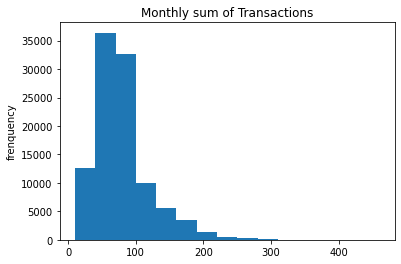

In [0]:
# 1.3.2 Create a histogram of both columns you created. 
bins, counts = clnt_monthly_aggregations.select('mth_txn_amt_sum').rdd.flatMap(lambda x: x).histogram(15)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Monthly sum of Transactions')
plt.ylabel('frenquency')
plt.show()

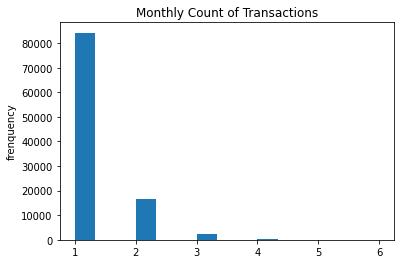

In [0]:
bins, counts = clnt_monthly_aggregations.select('mth_txn_cnt').rdd.flatMap(lambda x: x).histogram(15)
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title('Monthly Count of Transactions')
plt.ylabel('frenquency')
plt.show()

In [0]:
# most common and maximum values for each column, MONTHLY
print('The most common value for mth_txn_amt_sum:')
clnt_monthly_aggregations.groupby("mth_txn_amt_sum").count().orderBy("count", ascending=False).show(1)

print('The most common value for mth_txn_cnt:')
clnt_monthly_aggregations.groupby("mth_txn_cnt").count().orderBy("count", ascending=False).show(1)

The most common value for mth_txn_amt_sum:
+---------------+-----+
|mth_txn_amt_sum|count|
+---------------+-----+
|           77.0| 1293|
+---------------+-----+
only showing top 1 row

The most common value for mth_txn_cnt:
+-----------+-----+
|mth_txn_cnt|count|
+-----------+-----+
|          1|84247|
+-----------+-----+
only showing top 1 row



In [0]:
# MONTHLY
print('The maximum value for mth_txn_cnt:')
clnt_monthly_aggregations.agg({"mth_txn_cnt":"max"}).show()

print('The maximum value for mth_txn_amt_sum:')
clnt_monthly_aggregations.agg({"mth_txn_amt_sum":"max"}).show()

The maximum value for mth_txn_cnt:
+----------------+
|max(mth_txn_cnt)|
+----------------+
|               6|
+----------------+

The maximum value for mth_txn_amt_sum:
+--------------------+
|max(mth_txn_amt_sum)|
+--------------------+
|               460.0|
+--------------------+



In [0]:
# most common and maximum values for each column, ANNUAL, for comparison.
print('The most common value for ann_txn_amt_sum:')
clnt_annual_aggregations.groupby("ann_txn_amt_sum").count().orderBy("count", ascending=False).show(1)

print('The most common value for ann_txn_cnt:')
clnt_annual_aggregations.groupby("ann_txn_cnt").count().orderBy("count", ascending=False).show(1)

The most common value for ann_txn_amt_sum:
+---------------+-----+
|ann_txn_amt_sum|count|
+---------------+-----+
|           97.0|  111|
+---------------+-----+
only showing top 1 row

The most common value for ann_txn_cnt:
+-----------+-----+
|ann_txn_cnt|count|
+-----------+-----+
|          3| 5023|
+-----------+-----+
only showing top 1 row



In [0]:
# ANNUAL, for comparison.
print('The maximum value for mth_txn_cnt:')
clnt_annual_aggregations.agg({"ann_txn_cnt":"max"}).show()

print('The maximum value for mth_txn_amt_sum:')
clnt_annual_aggregations.agg({"ann_txn_amt_sum":"max"}).show()

The maximum value for mth_txn_cnt:
+----------------+
|max(ann_txn_cnt)|
+----------------+
|              18|
+----------------+

The maximum value for mth_txn_amt_sum:
+--------------------+
|max(ann_txn_amt_sum)|
+--------------------+
|              1317.0|
+--------------------+



* For monthly transactions, the most common sum was below 150(77 actually),and the maximum transaction was above 400.(actually 460). The most of the customer only bought once, the highest time of transaction was 6.
* But for annual transactions, the most common sum was below 100(97 actully), and the maximum was more than above 1200 (actually 1317). The most of the customer bought 3 times, the highest time of transaction was 18.
* So we can see the transactions were not regular within a year. Both of the annual maximum times of buying and the annual maximum sum of transactions were just about 3 times of the monthly data. The modes also proved that the product/service was seasonal.

In [0]:
# confirm output dataframe for client with ID CS1112 with slicing the output dataframe
clnt_monthly_aggregations.filter(F.col('customer_id') == 'CS1112').show()

+-----------+----------+---------------+-----------+
|customer_id|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-----------+----------+---------------+-----------+
|     CS1112|2011-06-30|           56.0|          1|
|     CS1112|2011-08-31|           96.0|          1|
|     CS1112|2011-10-31|           60.0|          1|
|     CS1112|2012-04-30|           56.0|          1|
|     CS1112|2012-06-30|           52.0|          1|
|     CS1112|2012-07-31|           81.0|          1|
|     CS1112|2012-09-30|           72.0|          1|
|     CS1112|2012-12-31|           76.0|          1|
|     CS1112|2013-03-31|          105.0|          1|
|     CS1112|2013-07-31|           36.0|          1|
|     CS1112|2013-11-30|           71.0|          1|
|     CS1112|2014-04-30|           63.0|          1|
|     CS1112|2014-07-31|           90.0|          1|
|     CS1112|2014-12-31|           59.0|          1|
|     CS1112|2015-01-31|           39.0|          1|
+-----------+----------+---------------+------

## 1.4 Create the base table for the rolling window features

In [0]:
#1.4.1 unique elements in columns ’customer id’ and ’ME DT’
id = txn.select("customer_id").distinct()
me_dt = txn.select("ME_DT").distinct()
print("There are {} unique clients, and {} unique month-end-dates.".format(id.count(), me_dt.count()))

There are 6889 unique clients, and 47 unique month-end-dates.


In [0]:
#1.4.2  Generate all the possible combinations of ’customer id’ and ’ME DT’.
#1.4.3 convert the base table into a pandas object called base table pd.
base_table = id.crossJoin(me_dt) 
base_table_pd = base_table.withColumnRenamed("customer_id", "CLNT_NO")
display(base_table_pd)

CLNT_NO ME_DT CS6001 2012-05-31 CS3128 2012-05-31 CS5241 2012-05-31 CS3155 2012-05-31 CS4564 2012-05-31 CS2544 2012-05-31 CS4952 2012-05-31 CS5810 2012-05-31 CS2305 2012-05-31 CS5638 2012-05-31 CS5499 2012-05-31 CS3176 2012-05-31 CS3659 2012-05-31 CS3854 2012-05-31 CS4024 2012-05-31 CS5790 2012-05-31 CS2809 2012-05-31 CS5126 2012-05-31 CS3367 2012-05-31 CS5038 2012-05-31 CS3857 2012-05-31 CS2729 2012-05-31 CS6043 2012-05-31 CS2493 2012-05-31 CS5690 2012-05-31 CS2298 2012-05-31 CS3450 2012-05-31 CS5208 2012-05-31 CS1201 2012-05-31 CS4147 2012-05-31 CS5760 2012-05-31 CS1347 2012-05-31 CS5785 2012-05-31 CS3635 2012-05-31 CS4454 2012-05-31 CS1558 2012-05-31 CS1826 2012-05-31 CS5539 2012-05-31 CS4991 2012-05-31 CS3026 2012-05-31 CS4539 2012-05-31 CS5624 2012-05-31 CS1330 2012-05-31 CS5516 2012-05-31 CS1673 2012-05-31 CS4152 2012-05-31 CS4951 2012-05-31 CS6067 2012-05-31 CS3355 2012-05-31 CS3796 2012-05-31 CS3441 2012-05-31 CS3021 2012-05-31 CS3073 2012-05-31 CS1590 2012-05-31 CS3945 2012-05-31 CS2187 2012-05-31 CS4695 2012-05-31 CS4883 2012-05-31 CS4424 2012-05-31 CS5345 2012-05-31 CS4136 2012-05-31 CS5704 2012-05-31 CS1891 2012-05-31 CS1492 2012-05-31 CS4224 2012-05-31 CS2743 2012-05-31 CS1217 2012-05-31 CS2897 2012-05-31 CS3157 2012-05-31 CS1752 2012-05-31 CS3598 2012-05-31 CS2442 2012-05-31 CS2522 2012-05-31 CS5784 2012-05-31 CS2934 2012-05-31 CS2962 2012-05-31 CS3160 2012-05-31 CS5181 2012-05-31 CS2296 2012-05-31 CS6088 2012-05-31 CS5212 2012-05-31 CS4142 2012-05-31 CS1206 2012-05-31 CS4557 2012-05-31 CS5775 2012-05-31 CS5064 2012-05-31 CS4395 2012-05-31 CS4992 2012-05-31 CS5623 2012-05-31 CS4782 2012-05-31 CS5283 2012-05-31 CS3404 2012-05-31 CS5264 2012-05-31 CS4346 2012-05-31 CS3658 2012-05-31 CS6092 2012-05-31 CS5522 2012-05-31 CS1939 2012-05-31 CS3629 2012-05-31 CS1155 2012-05-31 CS5148 2012-05-31 CS2231 2012-05-31 CS6096 2012-05-31 CS2685 2012-05-31 CS1273 2012-05-31 CS1243 2012-05-31 CS3695 2012-05-31 CS2452 2012-05-31 CS4830 2012-05-31 CS2618 2012-05-31 CS3641 2012-05-31 CS4245 2012-05-31 CS1790 2012-05-31 CS2185 2012-05-31 CS4681 2012-05-31 CS2134 2012-05-31 CS2419 2012-05-31 CS4665 2012-05-31 CS3154 2012-05-31 CS2712 2012-05-31 CS3127 2012-05-31 CS2720 2012-05-31 CS3424 2012-05-31 CS4993 2012-05-31 CS5184 2012-05-31 CS2311 2012-05-31 CS1123 2012-05-31 CS1865 2012-05-31 CS1746 2012-05-31 CS3407 2012-05-31 CS3400 2012-05-31 CS5480 2012-05-31 CS3676 2012-05-31 CS1533 2012-05-31 CS1474 2012-05-31 CS5019 2012-05-31 CS5211 2012-05-31 CS4243 2012-05-31 CS2302 2012-05-31 CS4738 2012-05-31 CS3732 2012-05-31 CS2399 2012-05-31 CS1470 2012-05-31 CS3180 2012-05-31 CS2462 2012-05-31 CS4851 2012-05-31 CS2505 2012-05-31 CS2403 2012-05-31 CS1707 2012-05-31 CS3454 2012-05-31 CS2209 2012-05-31 CS2643 2012-05-31 CS1415 2012-05-31 CS1626 2012-05-31 CS2721 2012-05-31 CS3552 2012-05-31 CS3911 2012-05-31 CS2771 2012-05-31 CS1235 2012-05-31 CS1883 2012-05-31 CS4980 2012-05-31 CS4654 2012-05-31 CS1562 2012-05-31 CS2332 2012-05-31 CS2753 2012-05-31 CS4343 2012-05-31 CS6101 2012-05-31 CS5171 2012-05-31 CS5910 2012-05-31 CS5815 2012-05-31 CS1882 2012-05-31 CS2528 2012-05-31 CS4849 2012-05-31 CS5376 2012-05-31 CS4328 2012-05-31 CS5667 2012-05-31 CS1697 2012-05-31 CS4372 2012-05-31 CS2860 2012-05-31 CS6085 2012-05-31 CS4480 2012-05-31 CS4227 2012-05-31 CS5402 2012-05-31 CS4573 2012-05-31 CS3431 2012-05-31 CS5630 2012-05-31 CS3511 2012-05-31 CS2437 2012-05-31 CS5812 2012-05-31 CS2434 2012-05-31 CS3988 2012-05-31 CS5154 2012-05-31 CS3411 2012-05-31 CS1244 2012-05-31 CS2359 2012-05-31 CS3885 2012-05-31 CS2942 2012-05-31 CS1164 2012-05-31 CS3964 2012-05-31 CS3331 2012-05-31 CS2531 2012-05-31 CS4716 2012-05-31 CS4708 2012-05-31 CS4094 2012-05-31 CS2905 2012-05-31 CS1984 2012-05-31 CS3506 2012-05-31 CS2666 2012-05-31 CS1639 2012-05-31 CS4338 2012-05-31 CS1456 2012-05-31 CS5633 2012-05-31 CS4306 2012-05-31 CS5292 2012-05-31 CS6056 2012-05-31 CS5925 2012-05-31 CS4645 2012-05-31 CS1228 2012-05-31 CS5761 2012-05-31 CS5620 2012-05-31 CS1511 2012-05-31 CS2234 2

In [0]:
#1.4.4 validate that you created the table you originally wanted
#Filter client CS1112 
CS1112 = base_table_pd.filter(F.col("CLNT_NO")=="CS1112")

# confirm that the dates fall between the min and max month-dates you identified in section 1.1.
CS1112.show() 

+-------+----------+
|CLNT_NO|     ME_DT|
+-------+----------+
| CS1112|2013-03-31|
| CS1112|2012-01-31|
| CS1112|2013-05-31|
| CS1112|2011-07-31|
| CS1112|2013-02-28|
| CS1112|2013-12-31|
| CS1112|2013-04-30|
| CS1112|2012-02-29|
| CS1112|2011-11-30|
| CS1112|2013-08-31|
| CS1112|2014-12-31|
| CS1112|2012-11-30|
| CS1112|2014-07-31|
| CS1112|2013-01-31|
| CS1112|2014-01-31|
| CS1112|2013-11-30|
| CS1112|2013-07-31|
| CS1112|2015-03-31|
| CS1112|2014-03-31|
| CS1112|2012-03-31|
+-------+----------+
only showing top 20 rows



In [0]:
#confirm that the snapshot of client CS1112 has 47 rows, one for each month in the dataset.
print("confirm that the snapshot of client CS1112 has 47 rows:", CS1112.count() == 47)

#Confirm that the base table pd has 323,783 rows
print("Confirm that the base table pd has 323,783 rows:", base_table_pd.count() == 323783)

confirm that the snapshot of client CS1112 has 47 rows: True
Confirm that the base table pd has 323,783 rows: True


## 1.5 Create the monthly rolling window features

In [0]:
#1.5.1 Left-join the base table pd with the clnt monthly aggregations table on [CLNT NO, ME DT] to create the table base clnt mth
clnt_monthly_aggregations = clnt_monthly_aggregations.withColumnRenamed("customer_id", "CLNT_NO")
base_clnt_mth = base_table_pd.join(clnt_monthly_aggregations,["CLNT_NO", "ME_DT"], "left_outer").fillna(0)
print('There are {} rows.'.format(base_clnt_mth.count()))
display(base_clnt_mth)

There are 323783 rows.


CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt CS6001 2012-05-31 0.0 0 CS3128 2012-05-31 0.0 0 CS5241 2012-05-31 37.0 1 CS3155 2012-05-31 82.0 1 CS4564 2012-05-31 93.0 1 CS2544 2012-05-31 0.0 0 CS4952 2012-05-31 100.0 1 CS5810 2012-05-31 99.0 1 CS2305 2012-05-31 0.0 0 CS5638 2012-05-31 54.0 1 CS5499 2012-05-31 0.0 0 CS3176 2012-05-31 0.0 0 CS3659 2012-05-31 151.0 2 CS3854 2012-05-31 88.0 1 CS4024 2012-05-31 62.0 1 CS5790 2012-05-31 0.0 0 CS2809 2012-05-31 143.0 2 CS5126 2012-05-31 98.0 1 CS3367 2012-05-31 0.0 0 CS5038 2012-05-31 0.0 0 CS3857 2012-05-31 38.0 1 CS2729 2012-05-31 0.0 0 CS6043 2012-05-31 0.0 0 CS2493 2012-05-31 0.0 0 CS5690 2012-05-31 0.0 0 CS2298 2012-05-31 97.0 1 CS3450 2012-05-31 65.0 1 CS5208 2012-05-31 0.0 0 CS1201 2012-05-31 0.0 0 CS4147 2012-05-31 0.0 0 CS5760 2012-05-31 176.0 2 CS1347 2012-05-31 84.0 1 CS5785 2012-05-31 38.0 1 CS3635 2012-05-31 53.0 1 CS4454 2012-05-31 0.0 0 CS1558 2012-05-31 153.0 2 CS1826 2012-05-31 0.0 0 CS5539 2012-05-31 101.0 1 CS4991 2012-05-31 0.0 0 CS3026 2012-05-31 0.0 0 CS4539 2012-05-31 0.0 0 CS5624 2012-05-31 194.0 2 CS1330 2012-05-31 89.0 1 CS5516 2012-05-31 0.0 0 CS1673 2012-05-31 0.0 0 CS4152 2012-05-31 0.0 0 CS4951 2012-05-31 0.0 0 CS6067 2012-05-31 0.0 0 CS3355 2012-05-31 60.0 1 CS3796 2012-05-31 0.0 0 CS3441 2012-05-31 122.0 2 CS3021 2012-05-31 0.0 0 CS3073 2012-05-31 0.0 0 CS1590 2012-05-31 40.0 1 CS3945 2012-05-31 0.0 0 CS2187 2012-05-31 80.0 1 CS4695 2012-05-31 0.0 0 CS4883 2012-05-31 0.0 0 CS4424 2012-05-31 0.0 0 CS5345 2012-05-31 0.0 0 CS4136 2012-05-31 109.0 2 CS5704 2012-05-31 0.0 0 CS1891 2012-05-31 0.0 0 CS1492 2012-05-31 43.0 1 CS4224 2012-05-31 0.0 0 CS2743 2012-05-31 71.0 1 CS1217 2012-05-31 0.0 0 CS2897 2012-05-31 92.0 1 CS3157 2012-05-31 0.0 0 CS1752 2012-05-31 103.0 1 CS3598 2012-05-31 92.0 1 CS2442 2012-05-31 62.0 1 CS2522 2012-05-31 0.0 0 CS5784 2012-05-31 79.0 1 CS2934 2012-05-31 0.0 0 CS2962 2012-05-31 0.0 0 CS3160 2012-05-31 0.0 0 CS5181 2012-05-31 140.0 2 CS2296 2012-05-31 0.0 0 CS6088 2012-05-31 90.0 1 CS5212 2012-05-31 0.0 0 CS4142 2012-05-31 100.0 1 CS1206 2012-05-31 0.0 0 CS4557 2012-05-31 0.0 0 CS5775 2012-05-31 0.0 0 CS5064 2012-05-31 0.0 0 CS4395 2012-05-31 83.0 1 CS4992 2012-05-31 53.0 1 CS5623 2012-05-31 0.0 0 CS4782 2012-05-31 58.0 1 CS5283 2012-05-31 97.0 1 CS3404 2012-05-31 0.0 0 CS5264 2012-05-31 48.0 1 CS4346 2012-05-31 0.0 0 CS3658 2012-05-31 37.0 1 CS6092 2012-05-31 0.0 0 CS5522 2012-05-31 0.0 0 CS1939 2012-05-31 0.0 0 CS3629 2012-05-31 0.0 0 CS1155 2012-05-31 0.0 0 CS5148 2012-05-31 0.0 0 CS2231 2012-05-31 0.0 0 CS6096 2012-05-31 72.0 1 CS2685 2012-05-31 91.0 1 CS1273 2012-05-31 41.0 1 CS1243 2012-05-31 0.0 0 CS3695 2012-05-31 49.0 1 CS2452 2012-05-31 0.0 0 CS4830 2012-05-31 0.0 0 CS2618 2012-05-31 0.0 0 CS3641 2012-05-31 0.0 0 CS4245 2012-05-31 63.0 1 CS1790 2012-05-31 0.0 0 CS2185 2012-05-31 0.0 0 CS4681 2012-05-31 0.0 0 CS2134 2012-05-31 0.0 0 CS2419 2012-05-31 100.0 1 CS4665 2012-05-31 0.0 0 CS3154 2012-05-31 0.0 0 CS2712 2012-05-31 0.0 0 CS3127 2012-05-31 0.0 0 CS2720 2012-05-31 0.0 0 CS3424 2012-05-31 0.0 0 CS4993 2012-05-31 0.0 0 CS5184 2012-05-31 0.0 0 CS2311 2012-05-31 157.0 2 CS1123 2012-05-31 0.0 0 CS1865 2012-05-31 0.0 0 CS1746 2012-05-31 0.0 0 CS3407 2012-05-31 0.0 0 CS3400 2012-05-31 0.0 0 CS5480 2012-05-31 0.0 0 CS3676 2012-05-31 0.0 0 CS1533 2012-05-31 0.0 0 CS1474 2012-05-31 37.0 1 CS5019 2012-05-31 0.0 0 CS5211 2012-05-31 138.0 2 CS4243 2012-05-31 0.0 0 CS2302 2012-05-31 0.0 0 CS4738 2012-05-31 0.0 0 CS3732 2012-05-31 0.0 0 CS2399 2012-05-31 0.0 0 CS1470 2012-05-31 94.0 1 CS3180 2012-05-31 180.0 2 CS2462 2012-05-31 0.0 0 CS4851 2012-05-31 0.0 0 CS2505 2012-05-31 0.0 0 CS2403 2012-05-31 56.0 1 CS1707 2012-05-31 0.0 0 CS3454 2012-05-31 187.0 2 CS2209 2012-05-31 0.0 0 CS2643 2012-05-31 0.0 0 CS1415 2012-05-31 51.0 1 CS1626 2012-05-31 0.0 0 CS2721 2012-05-31 0.0 0 CS3552 2012-05-31 0.0 0 CS3911 2012-05-31 0.0 0 CS2771 2012-05-31 0.0 0 CS1235 2012-05-31 56.0 1 CS1883 2012-05-31 0.0 0 CS4980 2012-05-31 0.0 0 CS4654 2012-05-31 0

#### Observations:
* There are missing values as the customer had zero value for transaction amount in that month. So I filled them with value 0.
* 323783 rows, as expected with the same numbers of rows of base_table. The main difference of base_clnt_mth and clnt_monthly_aggregations is that, the first one contains value 0 if there is no transaction in that month, but the later one just drop these months.

In [0]:
#1.5.2 calculation of the rolling window features
base_clnt_mth = base_clnt_mth.sort("CLNT_NO","ME_DT")
display(base_clnt_mth)

CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt CS1112 2011-05-31 0.0 0 CS1112 2011-06-30 56.0 1 CS1112 2011-07-31 0.0 0 CS1112 2011-08-31 96.0 1 CS1112 2011-09-30 0.0 0 CS1112 2011-10-31 60.0 1 CS1112 2011-11-30 0.0 0 CS1112 2011-12-31 0.0 0 CS1112 2012-01-31 0.0 0 CS1112 2012-02-29 0.0 0 CS1112 2012-03-31 0.0 0 CS1112 2012-04-30 56.0 1 CS1112 2012-05-31 0.0 0 CS1112 2012-06-30 52.0 1 CS1112 2012-07-31 81.0 1 CS1112 2012-08-31 0.0 0 CS1112 2012-09-30 72.0 1 CS1112 2012-10-31 0.0 0 CS1112 2012-11-30 0.0 0 CS1112 2012-12-31 76.0 1 CS1112 2013-01-31 0.0 0 CS1112 2013-02-28 0.0 0 CS1112 2013-03-31 105.0 1 CS1112 2013-04-30 0.0 0 CS1112 2013-05-31 0.0 0 CS1112 2013-06-30 0.0 0 CS1112 2013-07-31 36.0 1 CS1112 2013-08-31 0.0 0 CS1112 2013-09-30 0.0 0 CS1112 2013-10-31 0.0 0 CS1112 2013-11-30 71.0 1 CS1112 2013-12-31 0.0 0 CS1112 2014-01-31 0.0 0 CS1112 2014-02-28 0.0 0 CS1112 2014-03-31 0.0 0 CS1112 2014-04-30 63.0 1 CS1112 2014-05-31 0.0 0 CS1112 2014-06-30 0.0 0 CS1112 2014-07-31 90.0 1 CS1112 2014-08-31 0.0 0 CS1112 2014-09-30 0.0 0 CS1112 2014-10-31 0.0 0 CS1112 2014-11-30 0.0 0 CS1112 2014-12-31 59.0 1 CS1112 2015-01-31 39.0 1 CS1112 2015-02-28 0.0 0 CS1112 2015-03-31 0.0 0 CS1113 2011-05-31 94.0 1 CS1113 2011-06-30 0.0 0 CS1113 2011-07-31 57.0 1 CS1113 2011-08-31 0.0 0 CS1113 2011-09-30 0.0 0 CS1113 2011-10-31 93.0 1 CS1113 2011-11-30 0.0 0 CS1113 2011-12-31 0.0 0 CS1113 2012-01-31 0.0 0 CS1113 2012-02-29 0.0 0 CS1113 2012-03-31 86.0 1 CS1113 2012-04-30 0.0 0 CS1113 2012-05-31 0.0 0 CS1113 2012-06-30 0.0 0 CS1113 2012-07-31 0.0 0 CS1113 2012-08-31 0.0 0 CS1113 2012-09-30 67.0 1 CS1113 2012-10-31 95.0 1 CS1113 2012-11-30 51.0 1 CS1113 2012-12-31 75.0 1 CS1113 2013-01-31 0.0 0 CS1113 2013-02-28 0.0 0 CS1113 2013-03-31 97.0 1 CS1113 2013-04-30 65.0 1 CS1113 2013-05-31 0.0 0 CS1113 2013-06-30 81.0 1 CS1113 2013-07-31 183.0 2 CS1113 2013-08-31 0.0 0 CS1113 2013-09-30 0.0 0 CS1113 2013-10-31 0.0 0 CS1113 2013-11-30 0.0 0 CS1113 2013-12-31 0.0 0 CS1113 2014-01-31 53.0 1 CS1113 2014-02-28 0.0 0 CS1113 2014-03-31 0.0 0 CS1113 2014-04-30 36.0 1 CS1113 2014-05-31 97.0 1 CS1113 2014-06-30 0.0 0 CS1113 2014-07-31 40.0 1 CS1113 2014-08-31 0.0 0 CS1113 2014-09-30 0.0 0 CS1113 2014-10-31 0.0 0 CS1113 2014-11-30 0.0 0 CS1113 2014-12-31 0.0 0 CS1113 2015-01-31 44.0 1 CS1113 2015-02-28 176.0 2 CS1113 2015-03-31 0.0 0 CS1114 2011-05-31 0.0 0 CS1114 2011-06-30 0.0 0 CS1114 2011-07-31 77.0 1 CS1114 2011-08-31 170.0 2 CS1114 2011-09-30 179.0 2 CS1114 2011-10-31 0.0 0 CS1114 2011-11-30 0.0 0 CS1114 2011-12-31 0.0 0 CS1114 2012-01-31 0.0 0 CS1114 2012-02-29 0.0 0 CS1114 2012-03-31 0.0 0 CS1114 2012-04-30 0.0 0 CS1114 2012-05-31 53.0 1 CS1114 2012-06-30 0.0 0 CS1114 2012-07-31 97.0 1 CS1114 2012-08-31 0.0 0 CS1114 2012-09-30 0.0 0 CS1114 2012-10-31 0.0 0 CS1114 2012-11-30 0.0 0 CS1114 2012-12-31 0.0 0 CS1114 2013-01-31 52.0 1 CS1114 2013-02-28 0.0 0 CS1114 2013-03-31 0.0 0 CS1114 2013-04-30 0.0 0 CS1114 2013-05-31 68.0 1 CS1114 2013-06-30 0.0 0 CS1114 2013-07-31 0.0 0 CS1114 2013-08-31 0.0 0 CS1114 2013-09-30 84.0 1 CS1114 2013-10-31 0.0 0 CS1114 2013-11-30 0.0 0 CS1114 2013-12-31 148.0 2 CS1114 2014-01-31 94.0 1 CS1114 2014-02-28 95.0 1 CS1114 2014-03-31 0.0 0 CS1114 2014-04-30 0.0 0 CS1114 2014-05-31 0.0 0 CS1114 2014-06-30 0.0 0 CS1114 2014-07-31 0.0 0 CS1114 2014-08-31 46.0 1 CS1114 2014-09-30 58.0 1 CS1114 2014-10-31 0.0 0 CS1114 2014-11-30 0.0 0 CS1114 2014-12-31 132.0 2 CS1114 2015-01-31 0.0 0 CS1114 2015-02-28 79.0 1 CS1114 2015-03-31 0.0 0 CS1115 2011-05-31 0.0 0 CS1115 2011-06-30 0.0 0 CS1115 2011-07-31 0.0 0 CS1115 2011-08-31 87.0 1 CS1115 2011-09-30 174.0 2 CS1115 2011-10-31 0.0 0 CS1115 2011-11-30 0.0 0 CS1115 2011-12-31 0.0 0 CS1115 2012-01-31 64.0 1 CS1115 2012-02-29 118.0 2 CS1115 2012-03-31 0.0 0 CS1115 2012-04-30 58.0 1 CS1115 2012-05-31 88.0 1 CS1115 2012-06-30 0.0 0 CS1115 2012-07-31 41.0 1 CS1115 2012-08-31 0.0 0 CS1115 2012-09-30 0.0 0 CS1115 2012-10-31 104.0 1 CS1115 2012-11-30 0.0 0 CS1115 2012-12-31 0.0 0 CS1115 2013-01-31 94.0 1 CS1

In [0]:
#1.5.3 calculate separately the 3, 6 and 12-month rolling window features
#1.5.4 Merge the 4 tables.
#1.5.5 Confirm that your final output all rolling features has 323,783 rows and 22 columns and save it as mth rolling features.xlsx.
from pyspark.sql.window import Window
windowSpec3M = Window.partitionBy("CLNT_NO").orderBy("ME_DT").rowsBetween(-2, Window.currentRow)
windowSpec6M = Window.partitionBy("CLNT_NO").orderBy("ME_DT").rowsBetween(-5, Window.currentRow)
windowSpec12M = Window.partitionBy("CLNT_NO").orderBy("ME_DT").rowsBetween(-11, Window.currentRow)

all_rolling_features = base_clnt_mth.withColumn("amt_sum_3M", F.sum("mth_txn_amt_sum").over(windowSpec3M)).\
withColumn("amt_mean_3M", F.avg("mth_txn_amt_sum").over(windowSpec3M)).\
withColumn("amt_max_3M", F.max("mth_txn_amt_sum").over(windowSpec3M)).\
withColumn("txn_cnt_sum_3M", F.sum("mth_txn_cnt").over(windowSpec3M)).\
withColumn("txn_cnt_mean_3M", F.avg("mth_txn_cnt").over(windowSpec3M)).\
withColumn("txn_cnt_max_3M", F.max("mth_txn_cnt").over(windowSpec3M)).\
withColumn("amt_sum_6M", F.sum("mth_txn_amt_sum").over(windowSpec6M)).\
withColumn("amt_mean_6M", F.avg("mth_txn_amt_sum").over(windowSpec6M)).\
withColumn("amt_max_6M", F.max("mth_txn_amt_sum").over(windowSpec6M)).\
withColumn("txn_cnt_sum_6M", F.sum("mth_txn_cnt").over(windowSpec6M)).\
withColumn("txn_cnt_mean_6M", F.avg("mth_txn_cnt").over(windowSpec6M)).\
withColumn("txn_cnt_max_6M", F.max("mth_txn_cnt").over(windowSpec6M)).\
withColumn("amt_sum_12M", F.sum("mth_txn_amt_sum").over(windowSpec12M)).\
withColumn("amt_mean_12M", F.avg("mth_txn_amt_sum").over(windowSpec12M)).\
withColumn("amt_max_12M", F.max("mth_txn_amt_sum").over(windowSpec12M)).\
withColumn("txn_cnt_sum_12M", F.sum("mth_txn_cnt").over(windowSpec12M)).\
withColumn("txn_cnt_mean_12M", F.avg("mth_txn_cnt").over(windowSpec12M)).\
withColumn("txn_cnt_max_12M", F.max("mth_txn_cnt").over(windowSpec12M))

print('-------------------------------------------------------')
print('All rolling features has {} rows and {} columns.'.format(all_rolling_features.count(),len(all_rolling_features.columns)))

display(all_rolling_features)

-------------------------------------------------------
All rolling features has 323783 rows and 22 columns.


CLNT_NO ME_DT mth_txn_amt_sum mth_txn_cnt amt_sum_3M amt_mean_3M amt_max_3M txn_cnt_sum_3M txn_cnt_mean_3M txn_cnt_max_3M amt_sum_6M amt_mean_6M amt_max_6M txn_cnt_sum_6M txn_cnt_mean_6M txn_cnt_max_6M amt_sum_12M amt_mean_12M amt_max_12M txn_cnt_sum_12M txn_cnt_mean_12M txn_cnt_max_12M CS1112 2011-05-31 0.0 0 0.0 0.0 0.0 0 0.0 0 0.0 0.0 0.0 0 0.0 0 0.0 0.0 0.0 0 0.0 0 CS1112 2011-06-30 56.0 1 56.0 28.0 56.0 1 0.5 1 56.0 28.0 56.0 1 0.5 1 56.0 28.0 56.0 1 0.5 1 CS1112 2011-07-31 0.0 0 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 CS1112 2011-08-31 96.0 1 152.0 50.666666666666664 96.0 2 0.6666666666666666 1 152.0 38.0 96.0 2 0.5 1 152.0 38.0 96.0 2 0.5 1 CS1112 2011-09-30 0.0 0 96.0 32.0 96.0 1 0.3333333333333333 1 152.0 30.4 96.0 2 0.4 1 152.0 30.4 96.0 2 0.4 1 CS1112 2011-10-31 60.0 1 156.0 52.0 96.0 2 0.6666666666666666 1 212.0 35.333333333333336 96.0 3 0.5 1 212.0 35.333333333333336 96.0 3 0.5 1 CS1112 2011-11-30 0.0 0 60.0 20.0 60.0 1 0.3333333333333333 1 212.0 35.333333333333336 96.0 3 0.5 1 212.0 30.285714285714285 96.0 3 0.42857142857142855 1 CS1112 2011-12-31 0.0 0 60.0 20.0 60.0 1 0.3333333333333333 1 156.0 26.0 96.0 2 0.3333333333333333 1 212.0 26.5 96.0 3 0.375 1 CS1112 2012-01-31 0.0 0 0.0 0.0 0.0 0 0.0 0 156.0 26.0 96.0 2 0.3333333333333333 1 212.0 23.555555555555557 96.0 3 0.3333333333333333 1 CS1112 2012-02-29 0.0 0 0.0 0.0 0.0 0 0.0 0 60.0 10.0 60.0 1 0.16666666666666666 1 212.0 21.2 96.0 3 0.3 1 CS1112 2012-03-31 0.0 0 0.0 0.0 0.0 0 0.0 0 60.0 10.0 60.0 1 0.16666666666666666 1 212.0 19.272727272727273 96.0 3 0.2727272727272727 1 CS1112 2012-04-30 56.0 1 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 56.0 9.333333333333334 56.0 1 0.16666666666666666 1 268.0 22.333333333333332 96.0 4 0.3333333333333333 1 CS1112 2012-05-31 0.0 0 56.0 18.666666666666668 56.0 1 0.3333333333333333 1 56.0 9.333333333333334 56.0 1 0.16666666666666666 1 268.0 22.333333333333332 96.0 4 0.3333333333333333 1 CS1112 2012-06-30 52.0 1 108.0 36.0 56.0 2 0.6666666666666666 1 108.0 18.0 56.0 2 0.3333333333333333 1 264.0 22.0 96.0 4 0.3333333333333333 1 CS1112 2012-07-31 81.0 1 133.0 44.333333333333336 81.0 2 0.6666666666666666 1 189.0 31.5 81.0 3 0.5 1 345.0 28.75 96.0 5 0.4166666666666667 1 CS1112 2012-08-31 0.0 0 133.0 44.333333333333336 81.0 2 0.6666666666666666 1 189.0 31.5 81.0 3 0.5 1 249.0 20.75 81.0 4 0.3333333333333333 1 CS1112 2012-09-30 72.0 1 153.0 51.0 81.0 2 0.6666666666666666 1 261.0 43.5 81.0 4 0.6666666666666666 1 321.0 26.75 81.0 5 0.4166666666666667 1 CS1112 2012-10-31 0.0 0 72.0 24.0 72.0 1 0.3333333333333333 1 205.0 34.166666666666664 81.0 3 0.5 1 261.0 21.75 81.0 4 0.3333333333333333 1 CS1112 2012-11-30 0.0 0 72.0 24.0 72.0 1 0.3333333333333333 1 205.0 34.166666666666664 81.0 3 0.5 1 261.0 21.75 81.0 4 0.3333333333333333 1 CS1112 2012-12-31 76.0 1 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 229.0 38.166666666666664 81.0 3 0.5 1 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-01-31 0.0 0 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 148.0 24.666666666666668 76.0 2 0.3333333333333333 1 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-02-28 0.0 0 76.0 25.333333333333332 76.0 1 0.3333333333333333 1 148.0 24.666666666666668 76.0 2 0.3333333333333333 1 337.0 28.083333333333332 81.0 5 0.4166666666666667 1 CS1112 2013-03-31 105.0 1 105.0 35.0 105.0 1 0.3333333333333333 1 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 442.0 36.833333333333336 105.0 6 0.5 1 CS1112 2013-04-30 0.0 0 105.0 35.0 105.0 1 0.3333333333333333 1 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 386.0 32.166666666666664 105.0 5 0.4166666666666667 1 CS1112 2013-05-31 0.0 0 105.0 35.0 105.0 1 0.3333333333333333 1 181.0 30.166666666666668 105.0 2 0.3333333333333333 1 386.0 32.166666666666664 105.0 5 0.4166666666666667 1 CS1112 2013-06-30 0.0 0 0.0 0.0 0.0 0 0.0 0 105.0 17.5 105.0 1 0.1666666

* How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?

The number of rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows is 2,5,11 repspectively. As the first rolling would appear in the ith(i=3/6/12) row for each client, so the first i-1 rows are meaningless, shown with missing values.

* How many levels do the index and columns have? Are these MultiIndex dataframes?

    - Two-level index, two-level columns if we use Pandas. ==> MultiIndex dataframes.
    - But here, the output table from databricks is just singleIndex. All rolling features has 323783 rows and 22 columns as shown.

* To save the table into csv.file:
    - all_rolling_features.to_excel('mth_rolling_features.xlsx')  ==> for pandas
    - Click 'download' ==> Databricks

## 1.6 Date-related features: date of the week

In [0]:
#1.6.1 extract the day of the week
temp = txn.withColumn("day_of_the_week",dayofweek(F.col("txn_date")-2)%7)
txn = temp.withColumn("day_name",date_format(F.col("txn_date"), "EEEE"))
display(txn)

customer_id tran_amount txn_date ME_DT YEAR day_of_the_week day_name CS5295 35 2013-02-11 2013-02-28 2013 0 Monday CS4768 39 2015-03-15 2015-03-31 2015 6 Sunday CS2122 52 2013-02-26 2013-02-28 2013 1 Tuesday CS1217 99 2011-11-16 2011-11-30 2011 2 Wednesday CS1850 78 2013-11-20 2013-11-30 2013 2 Wednesday CS5539 81 2014-03-26 2014-03-31 2014 2 Wednesday CS2724 93 2012-02-06 2012-02-29 2012 0 Monday CS5902 89 2015-01-30 2015-01-31 2015 4 Friday CS6040 76 2013-01-08 2013-01-31 2013 1 Tuesday CS3802 75 2013-08-20 2013-08-31 2013 1 Tuesday CS3494 94 2013-07-02 2013-07-31 2013 1 Tuesday CS3780 80 2013-03-25 2013-03-31 2013 0 Monday CS1171 59 2012-11-03 2012-11-30 2012 5 Saturday CS2892 43 2013-05-12 2013-05-31 2013 6 Sunday CS5552 78 2014-12-29 2014-12-31 2014 0 Monday CS6043 98 2014-01-15 2014-01-31 2014 2 Wednesday CS4147 81 2013-07-08 2013-07-31 2013 0 Monday CS4655 93 2013-12-30 2013-12-31 2013 0 Monday CS3904 103 2014-07-20 2014-07-31 2014 6 Sunday CS4102 96 2011-07-09 2011-07-31 2011 5 Saturday CS2086 75 2013-03-05 2013-03-31 2013 1 Tuesday CS6085 49 2013-01-09 2013-01-31 2013 2 Wednesday CS1328 54 2013-02-06 2013-02-28 2013 2 Wednesday CS4564 48 2012-03-27 2012-03-31 2012 1 Tuesday CS5910 98 2012-01-01 2012-01-31 2012 6 Sunday CS2748 37 2013-03-23 2013-03-31 2013 5 Saturday CS5147 72 2013-04-29 2013-04-30 2013 0 Monday CS1770 83 2012-11-02 2012-11-30 2012 4 Friday CS3510 81 2011-10-24 2011-10-31 2011 0 Monday CS2509 105 2011-12-05 2011-12-31 2011 0 Monday CS2859 77 2015-02-27 2015-02-28 2015 4 Friday CS1512 71 2015-02-21 2015-02-28 2015 5 Saturday CS4148 48 2013-08-22 2013-08-31 2013 3 Thursday CS1735 70 2012-03-31 2012-03-31 2012 5 Saturday CS1588 70 2012-01-27 2012-01-31 2012 4 Friday CS5514 36 2013-01-09 2013-01-31 2013 2 Wednesday CS5933 48 2013-10-07 2013-10-31 2013 0 Monday CS2797 87 2014-03-06 2014-03-31 2014 3 Thursday CS5313 88 2012-12-02 2012-12-31 2012 6 Sunday CS5966 39 2012-03-09 2012-03-31 2012 4 Friday CS5211 51 2014-05-18 2014-05-31 2014 6 Sunday CS1511 47 2015-01-13 2015-01-31 2015 1 Tuesday CS6087 37 2014-11-24 2014-11-30 2014 0 Monday CS5909 80 2012-02-04 2012-02-29 2012 5 Saturday CS2845 105 2013-03-08 2013-03-31 2013 4 Friday CS1433 78 2012-11-05 2012-11-30 2012 0 Monday CS4897 45 2014-04-12 2014-04-30 2014 5 Saturday CS2296 79 2012-12-28 2012-12-31 2012 4 Friday CS1494 59 2013-06-29 2013-06-30 2013 5 Saturday CS3688 55 2014-06-19 2014-06-30 2014 3 Thursday CS2287 94 2011-12-23 2011-12-31 2011 4 Friday CS3779 69 2011-06-26 2011-06-30 2011 6 Sunday CS1423 78 2014-06-05 2014-06-30 2014 3 Thursday CS2501 59 2012-11-14 2012-11-30 2012 2 Wednesday CS3434 98 2013-02-22 2013-02-28 2013 4 Friday CS2662 88 2014-08-31 2014-08-31 2014 6 Sunday CS2209 35 2012-03-12 2012-03-31 2012 0 Monday CS4530 40 2011-06-05 2011-06-30 2011 6 Sunday CS2848 53 2013-02-04 2013-02-28 2013 0 Monday CS2596 55 2011-09-19 2011-09-30 2011 0 Monday CS4421 86 2012-05-20 2012-05-31 2012 6 Sunday CS4905 93 2012-04-13 2012-04-30 2012 4 Friday CS5704 79 2011-12-04 2011-12-31 2011 6 Sunday CS2403 94 2014-07-27 2014-07-31 2014 6 Sunday CS5480 63 2012-01-28 2012-01-31 2012 5 Saturday CS5811 91 2013-08-23 2013-08-31 2013 4 Friday CS2051 101 2014-12-09 2014-12-31 2014 1 Tuesday CS3957 69 2012-08-30 2012-08-31 2012 3 Thursday CS4704 41 2014-11-25 2014-11-30 2014 1 Tuesday CS2289 67 2012-05-19 2012-05-31 2012 5 Saturday CS5218 45 2014-06-21 2014-06-30 2014 5 Saturday CS4637 71 2011-05-20 2011-05-31 2011 4 Friday CS3158 91 2012-05-06 2012-05-31 2012 6 Sunday CS4176 49 2012-07-30 2012-07-31 2012 0 Monday CS1939 101 2011-11-25 2011-11-30 2011 4 Friday CS5403 64 2011-12-01 2011-12-31 2011 3 Thursday CS5489 77 2014-12-02 2014-12-31 2014 1 Tuesday CS4563 101 2011-05-30 2011-05-31 2011 0 Monday CS3508 67 2012-05-23 2012-05-31 2012 2 Wednesday CS2703 40 2014-10-12 2014-10-31 2014 6 Sunday CS2596 76 2013-05-01 2013-05-31 2013 2 Wednesday CS5990 103 2012-10-19 2012-10-31 2012 4 Friday CS4215 54 2011-07-09 2011-07-31 2011 5 Saturday CS4811 77 2012-01-26 2012-01-3

Out[198]: Text(0.5, 1.0, 'counts of transactions by week of the day')

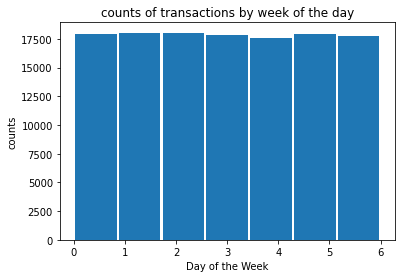

In [0]:
#1.6.2 bar plot that shows the count of transactions per day of the week
bins, counts = txn.select('day_of_the_week').rdd.flatMap(lambda x: x).histogram(7)
plt.hist(bins[:-1], bins=bins, weights=counts, rwidth = 0.95)
plt.xlabel('Day of the Week')
plt.ylabel('counts')
plt.title('counts of transactions by week of the day')

In [0]:
# show the exact values
txn.groupby('day_name').agg(F.count('day_name').alias('count')).show()

+---------+-----+
| day_name|count|
+---------+-----+
|Wednesday|18028|
|  Tuesday|18031|
|   Friday|17590|
| Thursday|17796|
| Saturday|17929|
|   Monday|17885|
|   Sunday|17741|
+---------+-----+



In [0]:
#1.6.3 generate the features that capture the count of transactions per client, year and day of the week.
clnt_annual_day_of_week_counts_aggregations = txn.groupBy("customer_id","YEAR","day_name").agg(F.count("tran_amount").alias("count"))
clnt_annual_day_of_week_counts_aggregations_pivot = clnt_annual_day_of_week_counts_aggregations.groupBy("customer_id","YEAR").pivot("day_name").mean("count").fillna(0)

display(clnt_annual_day_of_week_counts_aggregations_pivot.orderBy("customer_id","YEAR"))

customer_id YEAR Friday Monday Saturday Sunday Thursday Tuesday Wednesday CS1112 2011 1.0 0.0 0.0 1.0 0.0 0.0 1.0 CS1112 2012 0.0 0.0 1.0 3.0 0.0 1.0 0.0 CS1112 2013 1.0 1.0 0.0 0.0 0.0 0.0 1.0 CS1112 2014 0.0 0.0 0.0 0.0 1.0 1.0 1.0 CS1112 2015 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1113 2011 1.0 1.0 0.0 1.0 0.0 0.0 0.0 CS1113 2012 2.0 1.0 0.0 0.0 0.0 1.0 1.0 CS1113 2013 0.0 1.0 1.0 0.0 0.0 2.0 1.0 CS1113 2014 0.0 0.0 1.0 0.0 0.0 3.0 0.0 CS1113 2015 0.0 2.0 0.0 0.0 0.0 0.0 1.0 CS1114 2011 0.0 1.0 0.0 1.0 1.0 0.0 2.0 CS1114 2012 0.0 0.0 1.0 1.0 0.0 0.0 0.0 CS1114 2013 0.0 1.0 0.0 1.0 2.0 0.0 1.0 CS1114 2014 1.0 1.0 1.0 1.0 0.0 1.0 1.0 CS1114 2015 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1115 2011 0.0 0.0 1.0 1.0 0.0 0.0 1.0 CS1115 2012 1.0 1.0 0.0 2.0 1.0 1.0 1.0 CS1115 2013 0.0 1.0 2.0 0.0 2.0 0.0 2.0 CS1115 2014 0.0 0.0 0.0 0.0 2.0 0.0 2.0 CS1115 2015 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1116 2011 1.0 1.0 0.0 0.0 1.0 1.0 0.0 CS1116 2012 1.0 0.0 0.0 0.0 1.0 1.0 0.0 CS1116 2013 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1116 2014 3.0 1.0 0.0 1.0 0.0 0.0 0.0 CS1117 2011 1.0 0.0 0.0 0.0 1.0 0.0 1.0 CS1117 2012 1.0 1.0 0.0 0.0 0.0 0.0 1.0 CS1117 2013 0.0 2.0 0.0 3.0 0.0 0.0 0.0 CS1117 2014 0.0 0.0 1.0 1.0 1.0 2.0 1.0 CS1118 2011 0.0 0.0 0.0 0.0 0.0 0.0 2.0 CS1118 2012 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1118 2013 1.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1118 2014 1.0 2.0 0.0 3.0 0.0 2.0 1.0 CS1118 2015 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1119 2012 0.0 0.0 0.0 1.0 1.0 1.0 2.0 CS1119 2013 0.0 0.0 0.0 0.0 1.0 1.0 1.0 CS1119 2014 2.0 1.0 1.0 0.0 0.0 0.0 2.0 CS1119 2015 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1120 2011 1.0 1.0 1.0 0.0 2.0 0.0 0.0 CS1120 2012 1.0 0.0 0.0 1.0 1.0 1.0 1.0 CS1120 2013 1.0 1.0 1.0 0.0 1.0 2.0 1.0 CS1120 2014 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1120 2015 3.0 1.0 2.0 0.0 0.0 0.0 0.0 CS1121 2011 0.0 1.0 0.0 0.0 2.0 1.0 0.0 CS1121 2012 1.0 1.0 1.0 4.0 1.0 1.0 1.0 CS1121 2013 4.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1121 2014 0.0 1.0 0.0 2.0 2.0 1.0 0.0 CS1121 2015 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1122 2011 1.0 0.0 1.0 2.0 0.0 1.0 0.0 CS1122 2012 1.0 0.0 1.0 1.0 0.0 2.0 0.0 CS1122 2013 0.0 0.0 2.0 0.0 0.0 0.0 1.0 CS1122 2014 1.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1122 2015 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1123 2011 1.0 3.0 0.0 0.0 2.0 1.0 0.0 CS1123 2012 0.0 0.0 0.0 1.0 0.0 1.0 0.0 CS1123 2013 0.0 2.0 0.0 0.0 1.0 0.0 1.0 CS1123 2014 1.0 1.0 0.0 1.0 1.0 0.0 2.0 CS1124 2011 1.0 1.0 0.0 0.0 0.0 0.0 1.0 CS1124 2012 1.0 0.0 1.0 0.0 4.0 1.0 1.0 CS1124 2013 0.0 1.0 0.0 1.0 1.0 1.0 0.0 CS1124 2014 0.0 0.0 0.0 1.0 0.0 0.0 1.0 CS1124 2015 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1125 2011 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1125 2012 0.0 1.0 1.0 1.0 1.0 1.0 0.0 CS1125 2013 1.0 0.0 1.0 0.0 1.0 0.0 1.0 CS1125 2014 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1125 2015 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1126 2011 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1126 2012 2.0 0.0 4.0 0.0 0.0 1.0 1.0 CS1126 2013 2.0 0.0 1.0 1.0 0.0 0.0 1.0 CS1126 2014 0.0 1.0 0.0 1.0 1.0 1.0 1.0 CS1127 2011 0.0 2.0 0.0 0.0 1.0 2.0 2.0 CS1127 2012 0.0 1.0 2.0 0.0 1.0 0.0 0.0 CS1127 2013 0.0 1.0 0.0 1.0 1.0 2.0 0.0 CS1127 2014 0.0 0.0 2.0 1.0 3.0 0.0 0.0 CS1127 2015 0.0 0.0 0.0 0.0 1.0 1.0 0.0 CS1128 2011 1.0 1.0 1.0 0.0 0.0 1.0 1.0 CS1128 2012 1.0 0.0 1.0 0.0 0.0 0.0 3.0 CS1128 2013 1.0 1.0 1.0 2.0 0.0 0.0 0.0 CS1128 2014 0.0 1.0 3.0 3.0 1.0 1.0 2.0 CS1129 2011 1.0 1.0 1.0 0.0 0.0 0.0 0.0 CS1129 2012 2.0 0.0 1.0 1.0 0.0 0.0 0.0 CS1129 2013 1.0 0.0 0.0 0.0 0.0 2.0 0.0 CS1129 2014 0.0 0.0 0.0 1.0 1.0 0.0 0.0 CS1130 2011 0.0 0.0 0.0 0.0 2.0 0.0 0.0 CS1130 2012 0.0 0.0 0.0 0.0 2.0 0.0 0.0 CS1130 2013 0.0 0.0 3.0 2.0 0.0 1.0 1.0 CS1130 2014 0.0 3.0 1.0 0.0 1.0 0.0 0.0 CS1130 2015 1.0 0.0 0.0 0.0 1.0 1.0 0.0 CS1131 2011 0.0 0.0 0.0 0.0 1.0 0.0 1.0 CS1131 2012 0.0 2.0 0.0 2.0 1.0 0.0 1.0 CS1131 2013 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1131 2014 0.0 1.0 0.0 1.0 1.0 0.0 0.0 CS1131 2015 1.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1132 2011 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1132 2012 1.0 2.0 0.0 1.0 1.0 1.0 2.0 CS1132 2013 2.0 1.0 0.0 0.0 1.0 0.0 1.0 CS1132 2014 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1132 2015 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1133

In [0]:
clnt_annual_day_of_week_counts_aggregations_pivot = clnt_annual_day_of_week_counts_aggregations_pivot.groupBy("customer_id").pivot("YEAR").agg(F.sum("Friday").alias("cnt_Friday"),\
                                                                                                                                               F.sum("Monday").alias("cnt_Monday"),\
                                                                                                                                             F.sum("Saturday").alias("cnt_Saturday"),\
                                                                                                                                             F.sum("Sunday").alias("cnt_Sunday"),\
                                                                                                                                             F.sum("Thursday").alias("cnt_Thursday"),\
                                                                                                                                             F.sum("Tuesday").alias("cnt_Tuesday"),\
                                                                                                                                             F.sum("Wednesday").alias("cnt_Wednesday"))

display(clnt_annual_day_of_week_counts_aggregations_pivot.orderBy("customer_id"))

customer_id 2011_cnt_Friday 2011_cnt_Monday 2011_cnt_Saturday 2011_cnt_Sunday 2011_cnt_Thursday 2011_cnt_Tuesday 2011_cnt_Wednesday 2012_cnt_Friday 2012_cnt_Monday 2012_cnt_Saturday 2012_cnt_Sunday 2012_cnt_Thursday 2012_cnt_Tuesday 2012_cnt_Wednesday 2013_cnt_Friday 2013_cnt_Monday 2013_cnt_Saturday 2013_cnt_Sunday 2013_cnt_Thursday 2013_cnt_Tuesday 2013_cnt_Wednesday 2014_cnt_Friday 2014_cnt_Monday 2014_cnt_Saturday 2014_cnt_Sunday 2014_cnt_Thursday 2014_cnt_Tuesday 2014_cnt_Wednesday 2015_cnt_Friday 2015_cnt_Monday 2015_cnt_Saturday 2015_cnt_Sunday 2015_cnt_Thursday 2015_cnt_Tuesday 2015_cnt_Wednesday CS1112 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 3.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1113 1.0 1.0 0.0 1.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 1.0 0.0 0.0 3.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 CS1114 0.0 1.0 0.0 1.0 1.0 0.0 2.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1115 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 2.0 1.0 1.0 1.0 0.0 1.0 2.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1116 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 1.0 0.0 1.0 0.0 0.0 0.0 null null null null null null null CS1117 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 3.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 2.0 1.0 null null null null null null null CS1118 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 2.0 0.0 3.0 0.0 2.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1119 null null null null null null null 0.0 0.0 0.0 1.0 1.0 1.0 2.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 2.0 1.0 1.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1120 1.0 1.0 1.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 1.0 2.0 0.0 0.0 0.0 0.0 CS1121 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 1.0 1.0 4.0 1.0 1.0 1.0 4.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 2.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1122 1.0 0.0 1.0 2.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1123 1.0 3.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 2.0 null null null null null null null CS1124 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 4.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1125 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1126 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 4.0 0.0 0.0 1.0 1.0 2.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 null null null null null null null CS1127 0.0 2.0 0.0 0.0 1.0 2.0 2.0 0.0 1.0 2.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 2.0 0.0 0.0 0.0 2.0 1.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 CS1128 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 3.0 1.0 1.0 1.0 2.0 0.0 0.0 0.0 0.0 1.0 3.0 3.0 1.0 1.0 2.0 null null null null null null null CS1129 1.0 1.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 null null null null null null null CS1130 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 3.0 2.0 0.0 1.0 1.0 0.0 3.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 CS1131 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 2.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1132 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 2.0 0.0 1.0 1.0 1.0 2.0 2.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1133 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 1.0 0.0 2.0 0.0 3.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1134 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 2.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.

In [0]:
#1.6.4 Confirm the output has the same number of rows as the final output in section 1.2
print('Number of rows:',clnt_annual_day_of_week_counts_aggregations_pivot.count())
print('The same number of rows as the final output in section
      1.2:',clnt_annual_aggregations_pivot.count()==clnt_annual_day_of_week_counts_aggregations_pivot.count())

# clnt_annual_day_of_week_counts_aggregations_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx') for pandas
# Download directly in databricks

Number of rows: 6889
The same number of rows as the final output in section 1.2: True


In [0]:
#1.6.5 generate the features that capture the count of transactions per client, month-end-date and day of the week.
clnt_monthly_day_of_week_counts_aggregations = txn.groupBy("customer_id","ME_DT","day_name").agg(F.count("tran_amount").alias("count"))

clnt_monthly_day_of_week_counts_aggregations_pivot = clnt_monthly_day_of_week_counts_aggregations.groupBy("customer_id","ME_DT").pivot("day_name").mean("count").fillna(0).orderBy("customer_id","ME_DT")

display(clnt_monthly_day_of_week_counts_aggregations_pivot)


customer_id ME_DT Friday Monday Saturday Sunday Thursday Tuesday Wednesday CS1112 2011-06-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1112 2011-08-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2011-10-31 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1112 2012-04-30 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1112 2012-06-30 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1112 2012-07-31 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1112 2012-09-30 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1112 2012-12-31 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1112 2013-03-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-07-31 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-11-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1112 2014-04-30 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1112 2014-07-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1112 2014-12-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1112 2015-01-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1113 2011-05-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-07-31 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-10-31 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1113 2012-03-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-09-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1113 2012-10-31 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-11-30 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2012-12-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-03-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1113 2013-04-30 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1113 2013-06-30 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2013-07-31 0.0 1.0 0.0 0.0 0.0 1.0 0.0 CS1113 2014-01-31 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2014-04-30 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1113 2014-05-31 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2014-07-31 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2015-01-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1113 2015-02-28 0.0 2.0 0.0 0.0 0.0 0.0 0.0 CS1114 2011-07-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1114 2011-08-31 0.0 0.0 0.0 0.0 0.0 0.0 2.0 CS1114 2011-09-30 0.0 1.0 0.0 1.0 0.0 0.0 0.0 CS1114 2012-05-31 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1114 2012-07-31 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1114 2013-01-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1114 2013-05-31 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1114 2013-09-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1114 2013-12-31 0.0 0.0 0.0 1.0 1.0 0.0 0.0 CS1114 2014-01-31 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1114 2014-02-28 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1114 2014-08-31 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1114 2014-09-30 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1114 2014-12-31 1.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1114 2015-02-28 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1115 2011-08-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1115 2011-09-30 0.0 0.0 1.0 1.0 0.0 0.0 0.0 CS1115 2012-01-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1115 2012-02-29 0.0 0.0 0.0 2.0 0.0 0.0 0.0 CS1115 2012-04-30 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1115 2012-05-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1115 2012-07-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1115 2012-10-31 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1115 2013-01-31 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1115 2013-03-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1115 2013-05-31 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1115 2013-06-30 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1115 2013-09-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1115 2013-10-31 0.0 1.0 0.0 0.0 1.0 0.0 0.0 CS1115 2014-01-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1115 2014-03-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1115 2014-04-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1115 2014-06-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1115 2015-03-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1116 2011-06-30 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1116 2011-07-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1116 2011-08-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1116 2011-09-30 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1116 2012-02-29 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1116 2012-04-30 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1116 2012-08-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1116 2013-01-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1116 2014-02-28 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1116 2014-03-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1116 2014-05-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1116 2014-06-30 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1116 2014-08-31 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1117 2011-05-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1117 2011-06-30 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1117 2011-09-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1117 2012-01-31 0.0 1.0 0.0 0.0 0.0 0.0 1.0 CS1117 2012-02-29 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1117 2013-03-

In [0]:
# 1.6.6 join with base table pd 
temp =clnt_monthly_day_of_week_counts_aggregations_pivot.withColumnRenamed("customer_id", "CLNT_NO")
mth_day_counts = base_table_pd.join(temp,["CLNT_NO", "ME_DT"], "left_outer").orderBy("CLNT_NO","ME_DT").fillna(0)

display(mth_day_counts)

CLNT_NO ME_DT Friday Monday Saturday Sunday Thursday Tuesday Wednesday CS1112 2011-05-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2011-06-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1112 2011-07-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2011-08-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2011-09-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2011-10-31 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1112 2011-11-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2011-12-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2012-01-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2012-02-29 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2012-03-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2012-04-30 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1112 2012-05-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2012-06-30 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1112 2012-07-31 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1112 2012-08-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2012-09-30 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1112 2012-10-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2012-11-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2012-12-31 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1112 2013-01-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-02-28 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-03-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-04-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-05-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-06-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-07-31 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-08-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-09-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-10-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2013-11-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1112 2013-12-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-01-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-02-28 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-03-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-04-30 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1112 2014-05-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-06-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-07-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1112 2014-08-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-09-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-10-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-11-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2014-12-31 0.0 0.0 0.0 0.0 1.0 0.0 0.0 CS1112 2015-01-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1112 2015-02-28 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1112 2015-03-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-05-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-06-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-07-31 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-08-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-09-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-10-31 0.0 0.0 0.0 1.0 0.0 0.0 0.0 CS1113 2011-11-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2011-12-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-01-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-02-29 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-03-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-04-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-05-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-06-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-07-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-08-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-09-30 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1113 2012-10-31 0.0 1.0 0.0 0.0 0.0 0.0 0.0 CS1113 2012-11-30 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2012-12-31 1.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-01-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-02-28 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-03-31 0.0 0.0 0.0 0.0 0.0 0.0 1.0 CS1113 2013-04-30 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1113 2013-05-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-06-30 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2013-07-31 0.0 1.0 0.0 0.0 0.0 1.0 0.0 CS1113 2013-08-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-09-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-10-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-11-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2013-12-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2014-01-31 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2014-02-28 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2014-03-31 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2014-04-30 0.0 0.0 1.0 0.0 0.0 0.0 0.0 CS1113 2014-05-31 0.0 0.0 0.0 0.0 0.0 1.0 0.0 CS1113 2014-06-30 0.0 0.0 0.0 0.0 0.0 0.0 0.0 CS1113 2014-07-31 0

## 1.7 Date-related features: days since last transactions

In [0]:
#1.7.1 capture the last transaction in a month for every client.
last_monthly_purchase = txn.groupBy('customer_id', 'ME_DT').agg(F.max("txn_date").alias('last_monthly_purchase')).orderBy(txn.customer_id, txn.ME_DT)
display(last_monthly_purchase)

customer_id ME_DT last_monthly_purchase CS1112 2011-06-30 2011-06-15 CS1112 2011-08-31 2011-08-19 CS1112 2011-10-31 2011-10-02 CS1112 2012-04-30 2012-04-08 CS1112 2012-06-30 2012-06-24 CS1112 2012-07-31 2012-07-03 CS1112 2012-09-30 2012-09-16 CS1112 2012-12-31 2012-12-15 CS1112 2013-03-31 2013-03-01 CS1112 2013-07-31 2013-07-01 CS1112 2013-11-30 2013-11-13 CS1112 2014-04-30 2014-04-29 CS1112 2014-07-31 2014-07-16 CS1112 2014-12-31 2014-12-04 CS1112 2015-01-31 2015-01-14 CS1113 2011-05-31 2011-05-27 CS1113 2011-07-31 2011-07-25 CS1113 2011-10-31 2011-10-23 CS1113 2012-03-31 2012-03-30 CS1113 2012-09-30 2012-09-05 CS1113 2012-10-31 2012-10-08 CS1113 2012-11-30 2012-11-06 CS1113 2012-12-31 2012-12-07 CS1113 2013-03-31 2013-03-06 CS1113 2013-04-30 2013-04-20 CS1113 2013-06-30 2013-06-18 CS1113 2013-07-31 2013-07-30 CS1113 2014-01-31 2014-01-07 CS1113 2014-04-30 2014-04-19 CS1113 2014-05-31 2014-05-27 CS1113 2014-07-31 2014-07-29 CS1113 2015-01-31 2015-01-14 CS1113 2015-02-28 2015-02-09 CS1114 2011-07-31 2011-07-14 CS1114 2011-08-31 2011-08-24 CS1114 2011-09-30 2011-09-19 CS1114 2012-05-31 2012-05-13 CS1114 2012-07-31 2012-07-28 CS1114 2013-01-31 2013-01-17 CS1114 2013-05-31 2013-05-27 CS1114 2013-09-30 2013-09-11 CS1114 2013-12-31 2013-12-29 CS1114 2014-01-31 2014-01-25 CS1114 2014-02-28 2014-02-04 CS1114 2014-08-31 2014-08-31 CS1114 2014-09-30 2014-09-01 CS1114 2014-12-31 2014-12-31 CS1114 2015-02-28 2015-02-12 CS1115 2011-08-31 2011-08-10 CS1115 2011-09-30 2011-09-11 CS1115 2012-01-31 2012-01-06 CS1115 2012-02-29 2012-02-26 CS1115 2012-04-30 2012-04-23 CS1115 2012-05-31 2012-05-03 CS1115 2012-07-31 2012-07-18 CS1115 2012-10-31 2012-10-16 CS1115 2013-01-31 2013-01-19 CS1115 2013-03-31 2013-03-20 CS1115 2013-05-31 2013-05-11 CS1115 2013-06-30 2013-06-27 CS1115 2013-09-30 2013-09-18 CS1115 2013-10-31 2013-10-17 CS1115 2014-01-31 2014-01-09 CS1115 2014-03-31 2014-03-13 CS1115 2014-04-30 2014-04-09 CS1115 2014-06-30 2014-06-18 CS1115 2015-03-31 2015-03-05 CS1116 2011-06-30 2011-06-27 CS1116 2011-07-31 2011-07-21 CS1116 2011-08-31 2011-08-19 CS1116 2011-09-30 2011-09-13 CS1116 2012-02-29 2012-02-14 CS1116 2012-04-30 2012-04-05 CS1116 2012-08-31 2012-08-24 CS1116 2013-01-31 2013-01-04 CS1116 2014-02-28 2014-02-07 CS1116 2014-03-31 2014-03-21 CS1116 2014-05-31 2014-05-30 CS1116 2014-06-30 2014-06-08 CS1116 2014-08-31 2014-08-25 CS1117 2011-05-31 2011-05-20 CS1117 2011-06-30 2011-06-02 CS1117 2011-09-30 2011-09-07 CS1117 2012-01-31 2012-01-30 CS1117 2012-02-29 2012-02-17 CS1117 2013-03-31 2013-03-24 CS1117 2013-05-31 2013-05-19 CS1117 2013-07-31 2013-07-21 CS1117 2014-01-31 2014-01-11 CS1117 2014-02-28 2014-02-04 CS1117 2014-03-31 2014-03-04 CS1117 2014-04-30 2014-04-24 CS1117 2014-06-30 2014-06-22 CS1117 2014-07-31 2014-07-02 CS1118 2011-05-31 2011-05-18 CS1118 2011-09-30 2011-09-14 CS1118 2012-04-30 2012-04-03 CS1118 2013-03-31 2013-03-01 CS1118 2013-10-31 2013-10-09 CS1118 2014-02-28 2014-02-23 CS1118 2014-03-31 2014-03-09 CS1118 2014-04-30 2014-04-20 CS1118 2014-06-30 2014-06-18 CS1118 2014-10-31 2014-10-13 CS1118 2014-12-31 2014-12-08 CS1118 2015-03-31 2015-03-14 CS1119 2012-02-29 2012-02-28 CS1119 2012-05-31 2012-05-03 CS1119 2012-09-30 2012-09-16 CS1119 2012-10-31 2012-10-24 CS1119 2013-02-28 2013-02-20 CS1119 2013-07-31 2013-07-09 CS1119 2013-10-31 2013-10-31 CS1119 2014-02-28 2014-02-28 CS1119 2014-04-30 2014-04-19 CS1119 2014-09-30 2014-09-22 CS1119 2014-11-30 2014-11-12 CS1119 2015-03-31 2015-03-05 CS1120 2011-05-31 2011-05-26 CS1120 2011-06-30 2011-06-23 CS1120 2011-07-31 2011-07-16 CS1120 2011-09-30 2011-09-30 CS1120 2012-02-29 2012-02-07 CS1120 2012-04-30 2012-04-27 CS1120 2012-07-31 2012-07-26 CS1120 2012-08-31 2012-08-19 CS1120 2013-04-30 2013-04-24 CS1120 2013-06-30 2013-06-28 CS1120 2013-07-31 2013-07-22 CS1120 2013-09-30 2013-09-24 CS1120 2013-12-31 2013-12-12 CS1120 2014-11-30 2014-11-24 CS1120 2015-01-31 2015-01-17 CS1120 2015-02-28 2015-02-20 CS1120 2015-03-31 2015-03-06 CS1121 2011-05-31 2011-05-30 CS1121 2011-06-3

In [0]:
#1.7.2 Join base table pd with last monthly purchase
temp = last_monthly_purchase.withColumnRenamed("customer_id", "CLNT_NO")
last_monthly_purchase_base = base_table_pd.join(temp,["CLNT_NO", "ME_DT"], "left_outer").orderBy("CLNT_NO","ME_DT")

display(last_monthly_purchase_base)  #NaT/null stands for ”Not a Timestamp

CLNT_NO ME_DT last_monthly_purchase CS1112 2011-05-31 null CS1112 2011-06-30 2011-06-15 CS1112 2011-07-31 null CS1112 2011-08-31 2011-08-19 CS1112 2011-09-30 null CS1112 2011-10-31 2011-10-02 CS1112 2011-11-30 null CS1112 2011-12-31 null CS1112 2012-01-31 null CS1112 2012-02-29 null CS1112 2012-03-31 null CS1112 2012-04-30 2012-04-08 CS1112 2012-05-31 null CS1112 2012-06-30 2012-06-24 CS1112 2012-07-31 2012-07-03 CS1112 2012-08-31 null CS1112 2012-09-30 2012-09-16 CS1112 2012-10-31 null CS1112 2012-11-30 null CS1112 2012-12-31 2012-12-15 CS1112 2013-01-31 null CS1112 2013-02-28 null CS1112 2013-03-31 2013-03-01 CS1112 2013-04-30 null CS1112 2013-05-31 null CS1112 2013-06-30 null CS1112 2013-07-31 2013-07-01 CS1112 2013-08-31 null CS1112 2013-09-30 null CS1112 2013-10-31 null CS1112 2013-11-30 2013-11-13 CS1112 2013-12-31 null CS1112 2014-01-31 null CS1112 2014-02-28 null CS1112 2014-03-31 null CS1112 2014-04-30 2014-04-29 CS1112 2014-05-31 null CS1112 2014-06-30 null CS1112 2014-07-31 2014-07-16 CS1112 2014-08-31 null CS1112 2014-09-30 null CS1112 2014-10-31 null CS1112 2014-11-30 null CS1112 2014-12-31 2014-12-04 CS1112 2015-01-31 2015-01-14 CS1112 2015-02-28 null CS1112 2015-03-31 null CS1113 2011-05-31 2011-05-27 CS1113 2011-06-30 null CS1113 2011-07-31 2011-07-25 CS1113 2011-08-31 null CS1113 2011-09-30 null CS1113 2011-10-31 2011-10-23 CS1113 2011-11-30 null CS1113 2011-12-31 null CS1113 2012-01-31 null CS1113 2012-02-29 null CS1113 2012-03-31 2012-03-30 CS1113 2012-04-30 null CS1113 2012-05-31 null CS1113 2012-06-30 null CS1113 2012-07-31 null CS1113 2012-08-31 null CS1113 2012-09-30 2012-09-05 CS1113 2012-10-31 2012-10-08 CS1113 2012-11-30 2012-11-06 CS1113 2012-12-31 2012-12-07 CS1113 2013-01-31 null CS1113 2013-02-28 null CS1113 2013-03-31 2013-03-06 CS1113 2013-04-30 2013-04-20 CS1113 2013-05-31 null CS1113 2013-06-30 2013-06-18 CS1113 2013-07-31 2013-07-30 CS1113 2013-08-31 null CS1113 2013-09-30 null CS1113 2013-10-31 null CS1113 2013-11-30 null CS1113 2013-12-31 null CS1113 2014-01-31 2014-01-07 CS1113 2014-02-28 null CS1113 2014-03-31 null CS1113 2014-04-30 2014-04-19 CS1113 2014-05-31 2014-05-27 CS1113 2014-06-30 null CS1113 2014-07-31 2014-07-29 CS1113 2014-08-31 null CS1113 2014-09-30 null CS1113 2014-10-31 null CS1113 2014-11-30 null CS1113 2014-12-31 null CS1113 2015-01-31 2015-01-14 CS1113 2015-02-28 2015-02-09 CS1113 2015-03-31 null CS1114 2011-05-31 null CS1114 2011-06-30 null CS1114 2011-07-31 2011-07-14 CS1114 2011-08-31 2011-08-24 CS1114 2011-09-30 2011-09-19 CS1114 2011-10-31 null CS1114 2011-11-30 null CS1114 2011-12-31 null CS1114 2012-01-31 null CS1114 2012-02-29 null CS1114 2012-03-31 null CS1114 2012-04-30 null CS1114 2012-05-31 2012-05-13 CS1114 2012-06-30 null CS1114 2012-07-31 2012-07-28 CS1114 2012-08-31 null CS1114 2012-09-30 null CS1114 2012-10-31 null CS1114 2012-11-30 null CS1114 2012-12-31 null CS1114 2013-01-31 2013-01-17 CS1114 2013-02-28 null CS1114 2013-03-31 null CS1114 2013-04-30 null CS1114 2013-05-31 2013-05-27 CS1114 2013-06-30 null CS1114 2013-07-31 null CS1114 2013-08-31 null CS1114 2013-09-30 2013-09-11 CS1114 2013-10-31 null CS1114 2013-11-30 null CS1114 2013-12-31 2013-12-29 CS1114 2014-01-31 2014-01-25 CS1114 2014-02-28 2014-02-04 CS1114 2014-03-31 null CS1114 2014-04-30 null CS1114 2014-05-31 null CS1114 2014-06-30 null CS1114 2014-07-31 null CS1114 2014-08-31 2014-08-31 CS1114 2014-09-30 2014-09-01 CS1114 2014-10-31 null CS1114 2014-11-30 null CS1114 2014-12-31 2014-12-31 CS1114 2015-01-31 null CS1114 2015-02-28 2015-02-12 CS1114 2015-03-31 null CS1115 2011-05-31 null CS1115 2011-06-30 null CS1115 2011-07-31 null CS1115 2011-08-31 2011-08-10 CS1115 2011-09-30 2011-09-11 CS1115 2011-10-31 null CS1115 2011-11-30 null CS1115 2011-12-31 null CS1115 2012-01-31 2012-01-06 CS1115 2012-02-29 2012-02-26 CS1115 2012-03-31 null CS1115 2012-04-30 2012-04-23 CS1115 2012-05-31 2012-05-03 CS1115 2012-06-30 null CS1115 2012-07-31 2012-07-18 CS1115 2012-08-31 null CS1115 2012-09-30 null 

In [0]:
#1.7.3 forward-fill the NaT values.
# Missing value here means the one did not have transaction in the month of ME_DT. So I filled them with the date of the last tansaction below(forward-fill).
from pyspark.sql.functions import last

windowSpec = Window.partitionBy("CLNT_NO").orderBy("ME_DT").rowsBetween(Window.unboundedPreceding, Window.currentRow)
Last = last("last_monthly_purchase", ignorenulls=True).over(windowSpec)
last_monthly_purchase_base = last_monthly_purchase_base.withColumn("last_monthly_purchase", Last)

# showing a snapshot that confirm the transition between clients CS1113 and CS1114.
display(last_monthly_purchase_base.filter(F.col("CLNT_NO")=="CS1113"))
display(last_monthly_purchase_base.filter(F.col("CLNT_NO")=="CS1114"))

CLNT_NO ME_DT last_monthly_purchase CS1113 2011-05-31 2011-05-27 CS1113 2011-06-30 2011-05-27 CS1113 2011-07-31 2011-07-25 CS1113 2011-08-31 2011-07-25 CS1113 2011-09-30 2011-07-25 CS1113 2011-10-31 2011-10-23 CS1113 2011-11-30 2011-10-23 CS1113 2011-12-31 2011-10-23 CS1113 2012-01-31 2011-10-23 CS1113 2012-02-29 2011-10-23 CS1113 2012-03-31 2012-03-30 CS1113 2012-04-30 2012-03-30 CS1113 2012-05-31 2012-03-30 CS1113 2012-06-30 2012-03-30 CS1113 2012-07-31 2012-03-30 CS1113 2012-08-31 2012-03-30 CS1113 2012-09-30 2012-09-05 CS1113 2012-10-31 2012-10-08 CS1113 2012-11-30 2012-11-06 CS1113 2012-12-31 2012-12-07 CS1113 2013-01-31 2012-12-07 CS1113 2013-02-28 2012-12-07 CS1113 2013-03-31 2013-03-06 CS1113 2013-04-30 2013-04-20 CS1113 2013-05-31 2013-04-20 CS1113 2013-06-30 2013-06-18 CS1113 2013-07-31 2013-07-30 CS1113 2013-08-31 2013-07-30 CS1113 2013-09-30 2013-07-30 CS1113 2013-10-31 2013-07-30 CS1113 2013-11-30 2013-07-30 CS1113 2013-12-31 2013-07-30 CS1113 2014-01-31 2014-01-07 CS1113 2014-02-28 2014-01-07 CS1113 2014-03-31 2014-01-07 CS1113 2014-04-30 2014-04-19 CS1113 2014-05-31 2014-05-27 CS1113 2014-06-30 2014-05-27 CS1113 2014-07-31 2014-07-29 CS1113 2014-08-31 2014-07-29 CS1113 2014-09-30 2014-07-29 CS1113 2014-10-31 2014-07-29 CS1113 2014-11-30 2014-07-29 CS1113 2014-12-31 2014-07-29 CS1113 2015-01-31 2015-01-14 CS1113 2015-02-28 2015-02-09 CS1113 2015-03-31 2015-02-09

CLNT_NO ME_DT last_monthly_purchase CS1114 2011-05-31 null CS1114 2011-06-30 null CS1114 2011-07-31 2011-07-14 CS1114 2011-08-31 2011-08-24 CS1114 2011-09-30 2011-09-19 CS1114 2011-10-31 2011-09-19 CS1114 2011-11-30 2011-09-19 CS1114 2011-12-31 2011-09-19 CS1114 2012-01-31 2011-09-19 CS1114 2012-02-29 2011-09-19 CS1114 2012-03-31 2011-09-19 CS1114 2012-04-30 2011-09-19 CS1114 2012-05-31 2012-05-13 CS1114 2012-06-30 2012-05-13 CS1114 2012-07-31 2012-07-28 CS1114 2012-08-31 2012-07-28 CS1114 2012-09-30 2012-07-28 CS1114 2012-10-31 2012-07-28 CS1114 2012-11-30 2012-07-28 CS1114 2012-12-31 2012-07-28 CS1114 2013-01-31 2013-01-17 CS1114 2013-02-28 2013-01-17 CS1114 2013-03-31 2013-01-17 CS1114 2013-04-30 2013-01-17 CS1114 2013-05-31 2013-05-27 CS1114 2013-06-30 2013-05-27 CS1114 2013-07-31 2013-05-27 CS1114 2013-08-31 2013-05-27 CS1114 2013-09-30 2013-09-11 CS1114 2013-10-31 2013-09-11 CS1114 2013-11-30 2013-09-11 CS1114 2013-12-31 2013-12-29 CS1114 2014-01-31 2014-01-25 CS1114 2014-02-28 2014-02-04 CS1114 2014-03-31 2014-02-04 CS1114 2014-04-30 2014-02-04 CS1114 2014-05-31 2014-02-04 CS1114 2014-06-30 2014-02-04 CS1114 2014-07-31 2014-02-04 CS1114 2014-08-31 2014-08-31 CS1114 2014-09-30 2014-09-01 CS1114 2014-10-31 2014-09-01 CS1114 2014-11-30 2014-09-01 CS1114 2014-12-31 2014-12-31 CS1114 2015-01-31 2014-12-31 CS1114 2015-02-28 2015-02-12 CS1114 2015-03-31 2015-02-12

In [0]:
#1.7.4 Subtract the two date columns and convert to .dt.days to calculate the column ’days since last txn’ 
from pyspark.sql.functions import datediff
last_monthly_purchase_base = last_monthly_purchase_base.withColumn("days_since_last_txn", F.datediff("ME_DT", "last_monthly_purchase"))
display(last_monthly_purchase_base)

CLNT_NO ME_DT last_monthly_purchase days_since_last_txn CS1112 2011-05-31 null null CS1112 2011-06-30 2011-06-15 15 CS1112 2011-07-31 2011-06-15 46 CS1112 2011-08-31 2011-08-19 12 CS1112 2011-09-30 2011-08-19 42 CS1112 2011-10-31 2011-10-02 29 CS1112 2011-11-30 2011-10-02 59 CS1112 2011-12-31 2011-10-02 90 CS1112 2012-01-31 2011-10-02 121 CS1112 2012-02-29 2011-10-02 150 CS1112 2012-03-31 2011-10-02 181 CS1112 2012-04-30 2012-04-08 22 CS1112 2012-05-31 2012-04-08 53 CS1112 2012-06-30 2012-06-24 6 CS1112 2012-07-31 2012-07-03 28 CS1112 2012-08-31 2012-07-03 59 CS1112 2012-09-30 2012-09-16 14 CS1112 2012-10-31 2012-09-16 45 CS1112 2012-11-30 2012-09-16 75 CS1112 2012-12-31 2012-12-15 16 CS1112 2013-01-31 2012-12-15 47 CS1112 2013-02-28 2012-12-15 75 CS1112 2013-03-31 2013-03-01 30 CS1112 2013-04-30 2013-03-01 60 CS1112 2013-05-31 2013-03-01 91 CS1112 2013-06-30 2013-03-01 121 CS1112 2013-07-31 2013-07-01 30 CS1112 2013-08-31 2013-07-01 61 CS1112 2013-09-30 2013-07-01 91 CS1112 2013-10-31 2013-07-01 122 CS1112 2013-11-30 2013-11-13 17 CS1112 2013-12-31 2013-11-13 48 CS1112 2014-01-31 2013-11-13 79 CS1112 2014-02-28 2013-11-13 107 CS1112 2014-03-31 2013-11-13 138 CS1112 2014-04-30 2014-04-29 1 CS1112 2014-05-31 2014-04-29 32 CS1112 2014-06-30 2014-04-29 62 CS1112 2014-07-31 2014-07-16 15 CS1112 2014-08-31 2014-07-16 46 CS1112 2014-09-30 2014-07-16 76 CS1112 2014-10-31 2014-07-16 107 CS1112 2014-11-30 2014-07-16 137 CS1112 2014-12-31 2014-12-04 27 CS1112 2015-01-31 2015-01-14 17 CS1112 2015-02-28 2015-01-14 45 CS1112 2015-03-31 2015-01-14 76 CS1114 2011-05-31 null null CS1114 2011-06-30 null null CS1114 2011-07-31 2011-07-14 17 CS1114 2011-08-31 2011-08-24 7 CS1114 2011-09-30 2011-09-19 11 CS1114 2011-10-31 2011-09-19 42 CS1114 2011-11-30 2011-09-19 72 CS1114 2011-12-31 2011-09-19 103 CS1114 2012-01-31 2011-09-19 134 CS1114 2012-02-29 2011-09-19 163 CS1114 2012-03-31 2011-09-19 194 CS1114 2012-04-30 2011-09-19 224 CS1114 2012-05-31 2012-05-13 18 CS1114 2012-06-30 2012-05-13 48 CS1114 2012-07-31 2012-07-28 3 CS1114 2012-08-31 2012-07-28 34 CS1114 2012-09-30 2012-07-28 64 CS1114 2012-10-31 2012-07-28 95 CS1114 2012-11-30 2012-07-28 125 CS1114 2012-12-31 2012-07-28 156 CS1114 2013-01-31 2013-01-17 14 CS1114 2013-02-28 2013-01-17 42 CS1114 2013-03-31 2013-01-17 73 CS1114 2013-04-30 2013-01-17 103 CS1114 2013-05-31 2013-05-27 4 CS1114 2013-06-30 2013-05-27 34 CS1114 2013-07-31 2013-05-27 65 CS1114 2013-08-31 2013-05-27 96 CS1114 2013-09-30 2013-09-11 19 CS1114 2013-10-31 2013-09-11 50 CS1114 2013-11-30 2013-09-11 80 CS1114 2013-12-31 2013-12-29 2 CS1114 2014-01-31 2014-01-25 6 CS1114 2014-02-28 2014-02-04 24 CS1114 2014-03-31 2014-02-04 55 CS1114 2014-04-30 2014-02-04 85 CS1114 2014-05-31 2014-02-04 116 CS1114 2014-06-30 2014-02-04 146 CS1114 2014-07-31 2014-02-04 177 CS1114 2014-08-31 2014-08-31 0 CS1114 2014-09-30 2014-09-01 29 CS1114 2014-10-31 2014-09-01 60 CS1114 2014-11-30 2014-09-01 90 CS1114 2014-12-31 2014-12-31 0 CS1114 2015-01-31 2014-12-31 31 CS1114 2015-02-28 2015-02-12 16 CS1114 2015-03-31 2015-02-12 47 CS1115 2011-05-31 null null CS1115 2011-06-30 null null CS1115 2011-07-31 null null CS1115 2011-08-31 2011-08-10 21 CS1115 2011-09-30 2011-09-11 19 CS1115 2011-10-31 2011-09-11 50 CS1115 2011-11-30 2011-09-11 80 CS1115 2011-12-31 2011-09-11 111 CS1115 2012-01-31 2012-01-06 25 CS1115 2012-02-29 2012-02-26 3 CS1115 2012-03-31 2012-02-26 34 CS1115 2012-04-30 2012-04-23 7 CS1115 2012-05-31 2012-05-03 28 CS1115 2012-06-30 2012-05-03 58 CS1115 2012-07-31 2012-07-18 13 CS1115 2012-08-31 2012-07-18 44 CS1115 2012-09-30 2012-07-18 74 CS1115 2012-10-31 2012-10-16 15 CS1115 2012-11-30 2012-10-16 45 CS1115 2012-12-31 2012-10-16 76 CS1115 2013-01-31 2013-01-19 12 CS1115 2013-02-28 2013-01-19 40 CS1115 2013-03-31 2013-03-20 11 CS1115 2013-04-30 2013-03-20 41 CS1115 2013-05-31 2013-05-11 20 CS1115 2013-06-30 2013-06-27 3 CS1115 2013-07-31 2013-06-27 34 CS1115 2013-08-31 2013-06-27 65 CS1115 2013-09-30 2013-09-18 12 CS1115 2013-10-31 2013-

Out[209]: Text(0.5, 0, 'days')

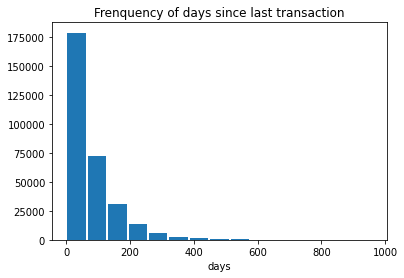

In [0]:
#1.7.5 histogram of the ’days_since_last_txn’, impute the remaining NaN values 
#Save the columns [’CLNT NO’, ’ME DT’, ’days since last txn’] as days_since_last_txn.xlsx.
bins, counts = last_monthly_purchase_base.select('days_since_last_txn').rdd.flatMap(lambda x: x).histogram(15)
plt.hist(bins[:-1], bins=bins, weights=counts, rwidth = 0.9)
plt.title('Frenquency of days since last transaction')
plt.xlabel('days')

#save in xlsx. file using Pandas
#last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel('days_since_last_txn.xlsx')

I would like to imput missing value with 0.